In [3]:
# 读入数据
import pandas as pd
rd=pd.read_csv(R'E:\code\python_code\BDManager\sunshaolong\model\因子分析20维数据.csv',index_col=0)
rd.head()

,泳池健身,护理按摩,宴会酒席,中餐厅菜品,婚宴婚礼,公共交通,酒店设施,西餐厅菜品,下午茶酒品,酒廊,...,打车&空气差,游乐,价格贵,卫生间&音乐,日料,长辈孩子同游,服务态度,空调&房间隔音,历史&设计,label
0,0.029810,0.045765,-0.016607,0.028772,0.026557,-0.027156,-0.021019,-0.028412,-0.016669,-0.150553,...,0.082497,-0.056564,-0.133095,-0.093225,-0.015738,0.161056,0.154721,-0.002084,-0.009993,1
1,1.129565,1.324284,1.503223,1.182611,1.149371,20.243247,0.036048,0.587170,0.579361,1.030450,...,3.122662,1.930230,-2.236521,-1.629814,-0.415996,-0.191336,0.942498,-0.306906,-0.766555,-1
2,0.113380,0.137732,0.187015,0.117512,0.129966,0.981701,0.141062,0.040679,0.001235,0.060275,...,0.656048,0.285357,-0.509809,-0.417252,-0.088661,-0.030604,0.214359,0.052981,-0.053427,1
3,0.130303,0.154464,0.197254,0.134266,0.144115,0.983246,0.144722,0.047023,0.004954,0.020829,...,0.657501,0.272685,-0.516043,-0.421925,-0.081141,-0.025779,0.218346,0.061396,-0.057581,1
4,0.117511,0.128078,0.254737,0.128391,0.151780,0.334925,0.328880,0.037059,-0.013657,0.211102,...,0.940115,0.429599,-0.581791,-0.879451,-0.135077,-0.183515,0.245517,0.520213,0.172435,1


In [4]:
X=rd.iloc[:,:-1]
y=rd.iloc[:,-1]
# y[y==-1]=0

In [3]:
y.value_counts()

1    41493
0     1649
Name: label, dtype: int64

In [5]:
# 划分训练与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [6]:
# 标准化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)

In [7]:
X_test = std.transform(X_test)
X_test = pd.DataFrame(X_test,columns =rd.columns[:-1], index=y_test.index)

In [8]:
from imblearn.over_sampling import SMOTE
smo=SMOTE(random_state=0)
print('采样前：',X.shape[0])
print(y_train.value_counts())
X_train,y_train = smo.fit_resample(X_train,y_train)
print('采样后：',X.shape[0])
print(y_train.value_counts())

采样前： 43142
 1    33182
-1     1331
Name: label, dtype: int64
采样后： 43142
 1    33182
-1    33182
Name: label, dtype: int64


In [8]:
pd.concat([pd.DataFrame(X_train,columns =rd.columns[:-1], index = y_train.index),y_train],axis = 1).to_csv('E:\code\python_code\BDManager\sunshaolong\model\smote采样后训练数据.csv')

In [9]:
pd.concat([X_test,y_test],axis=1).to_csv('E:\code\python_code\BDManager\sunshaolong\model\smote采样后测试数据.csv')

In [189]:
# pd.concat([X,y],axis=1).to_csv('E:\code\python_code\BDManager\sunshaolong\model\因子分析20维数据.csv')

# 1. 逻辑回归

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# pip=Pipeline(
#     [
#         ('std',StandardScaler()),
#         ('logit',LogisticRegression())
#     ]
# # )
# std = StandardScaler()
# X_std = std.fit_transform(X_train)
logit=LogisticRegression()
logit.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [11]:
logit.score(X_test,y_test)

E:\Anoconda\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8559508633677135

In [12]:
y_test.value_counts()

 1    8311
-1     318
Name: label, dtype: int64

In [9]:
X_test_neg=X.loc[y_test[y_test==-1].index]

In [10]:
X_test_neg

,泳池健身,护理按摩,宴会酒席,中餐厅菜品,婚宴婚礼,公共交通,酒店设施,西餐厅菜品,下午茶酒品,酒廊,房间卫生,打车&空气差,游乐,价格贵,卫生间&音乐,日料,长辈孩子同游,服务态度,空调&房间隔音,历史&设计
937,0.240354,0.238051,0.503959,0.276858,0.300723,0.273381,0.443235,0.110113,0.057644,0.595239,-0.084735,1.711461,0.870362,-0.840725,-1.960235,-0.256826,-0.474892,0.358017,1.693693,0.513381
30218,-0.021480,-0.009793,0.166746,-0.007726,0.031898,0.560022,0.275957,-0.018945,-0.056385,0.576649,0.103399,0.901786,0.539928,-0.642450,-0.688613,-0.208909,-0.231123,0.163226,0.431569,0.165597
29956,0.204884,0.216145,0.310094,0.221706,0.225610,0.537356,0.357387,0.080998,0.027369,0.084704,0.053381,0.970429,0.407702,-0.642824,-0.909104,-0.114569,-0.191189,0.235294,0.751549,0.162365
41604,0.490640,0.500563,0.301373,0.478987,0.410100,0.020628,0.058592,0.169747,0.066807,-1.132627,0.280088,0.172398,-0.269257,-0.446853,-0.249556,0.156824,0.225020,0.250806,0.118596,-0.257084
194,0.292659,0.307191,0.160192,0.288170,0.242525,-0.016108,0.016001,0.085440,0.002662,-0.743909,0.274883,0.075236,-0.203037,-0.300476,-0.142506,0.075698,0.191478,0.214395,0.039817,-0.216901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,-0.000896,0.016826,0.173794,0.015913,0.051987,0.429799,0.395220,-0.009750,-0.046161,0.456406,0.065869,0.912644,0.486745,-0.571685,-0.679749,-0.189889,-0.208760,0.222693,0.400876,0.165877
34558,0.101950,0.116961,0.231131,0.119354,0.133778,0.363090,0.335953,0.032986,-0.015500,0.254682,0.091818,0.886711,0.423062,-0.685371,-0.652746,-0.156494,-0.202194,0.215160,0.542147,0.140491
221,0.255820,0.285449,0.342381,0.263567,0.267480,1.853108,0.260252,0.108237,0.061025,-0.023763,0.159517,0.996698,0.382473,-0.693303,-0.610194,-0.079111,-0.095719,0.249525,0.210771,-0.032373
30572,0.354848,0.353064,0.557130,0.412570,0.387757,0.495719,0.515930,0.160306,0.084551,0.487734,-0.083667,1.856958,0.873787,-1.123059,-1.716462,-0.258600,-0.572400,0.200224,2.413658,0.516026


In [14]:
logit.score(X_test_neg,y_test[y_test==-1])

E:\Anoconda\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.4276729559748428

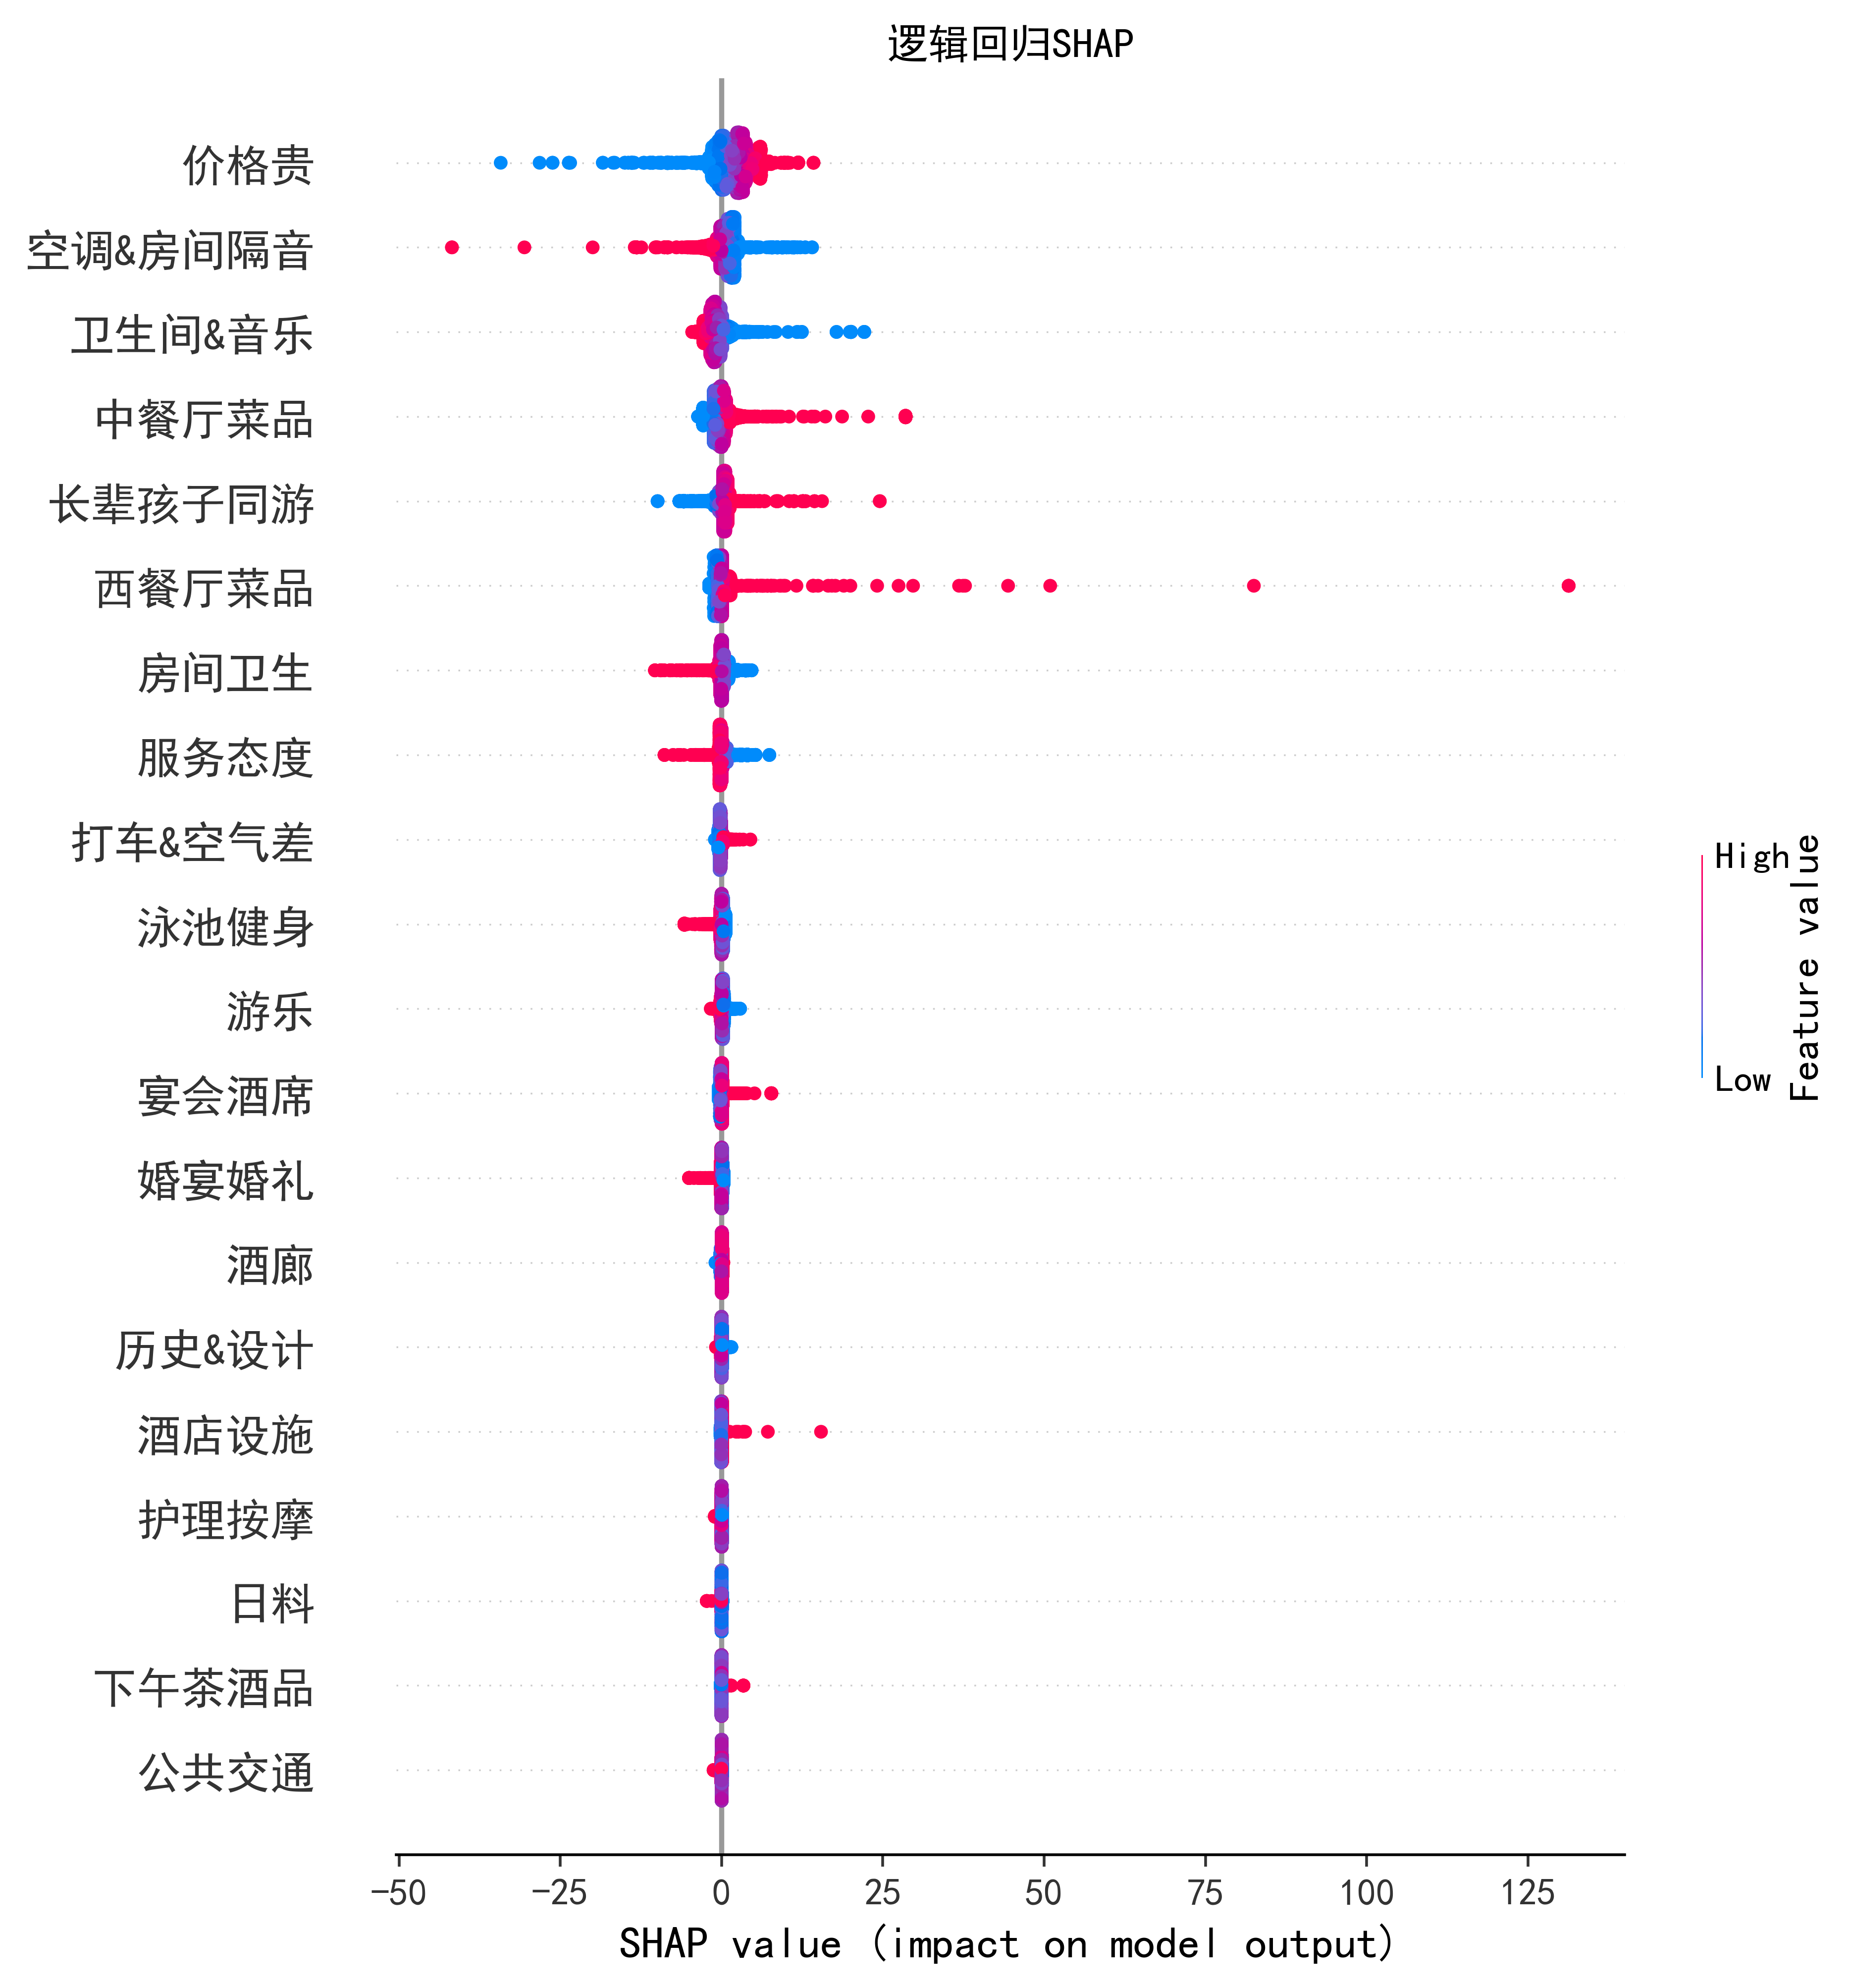

<Figure size 432x288 with 0 Axes>

In [23]:
import shap
import matplotlib.pyplot as pl
# 解决中文显示问题
pl.rcParams['font.sans-serif'] = ['SimHei']
pl.rcParams['axes.unicode_minus'] = False
explainer = shap.Explainer(logit, X_train)
shap_values = explainer(X_test)
cmap=['red','blue']
pl.figure(dpi=500)
pl.title('逻辑回归SHAP')
shap.summary_plot(shap_values, X_test)
pl.savefig(R"E:\code\python_code\BDManager\sunshaolong\tripadvisor_code\image\逻辑回归SHAP1.svg", dpi=500)

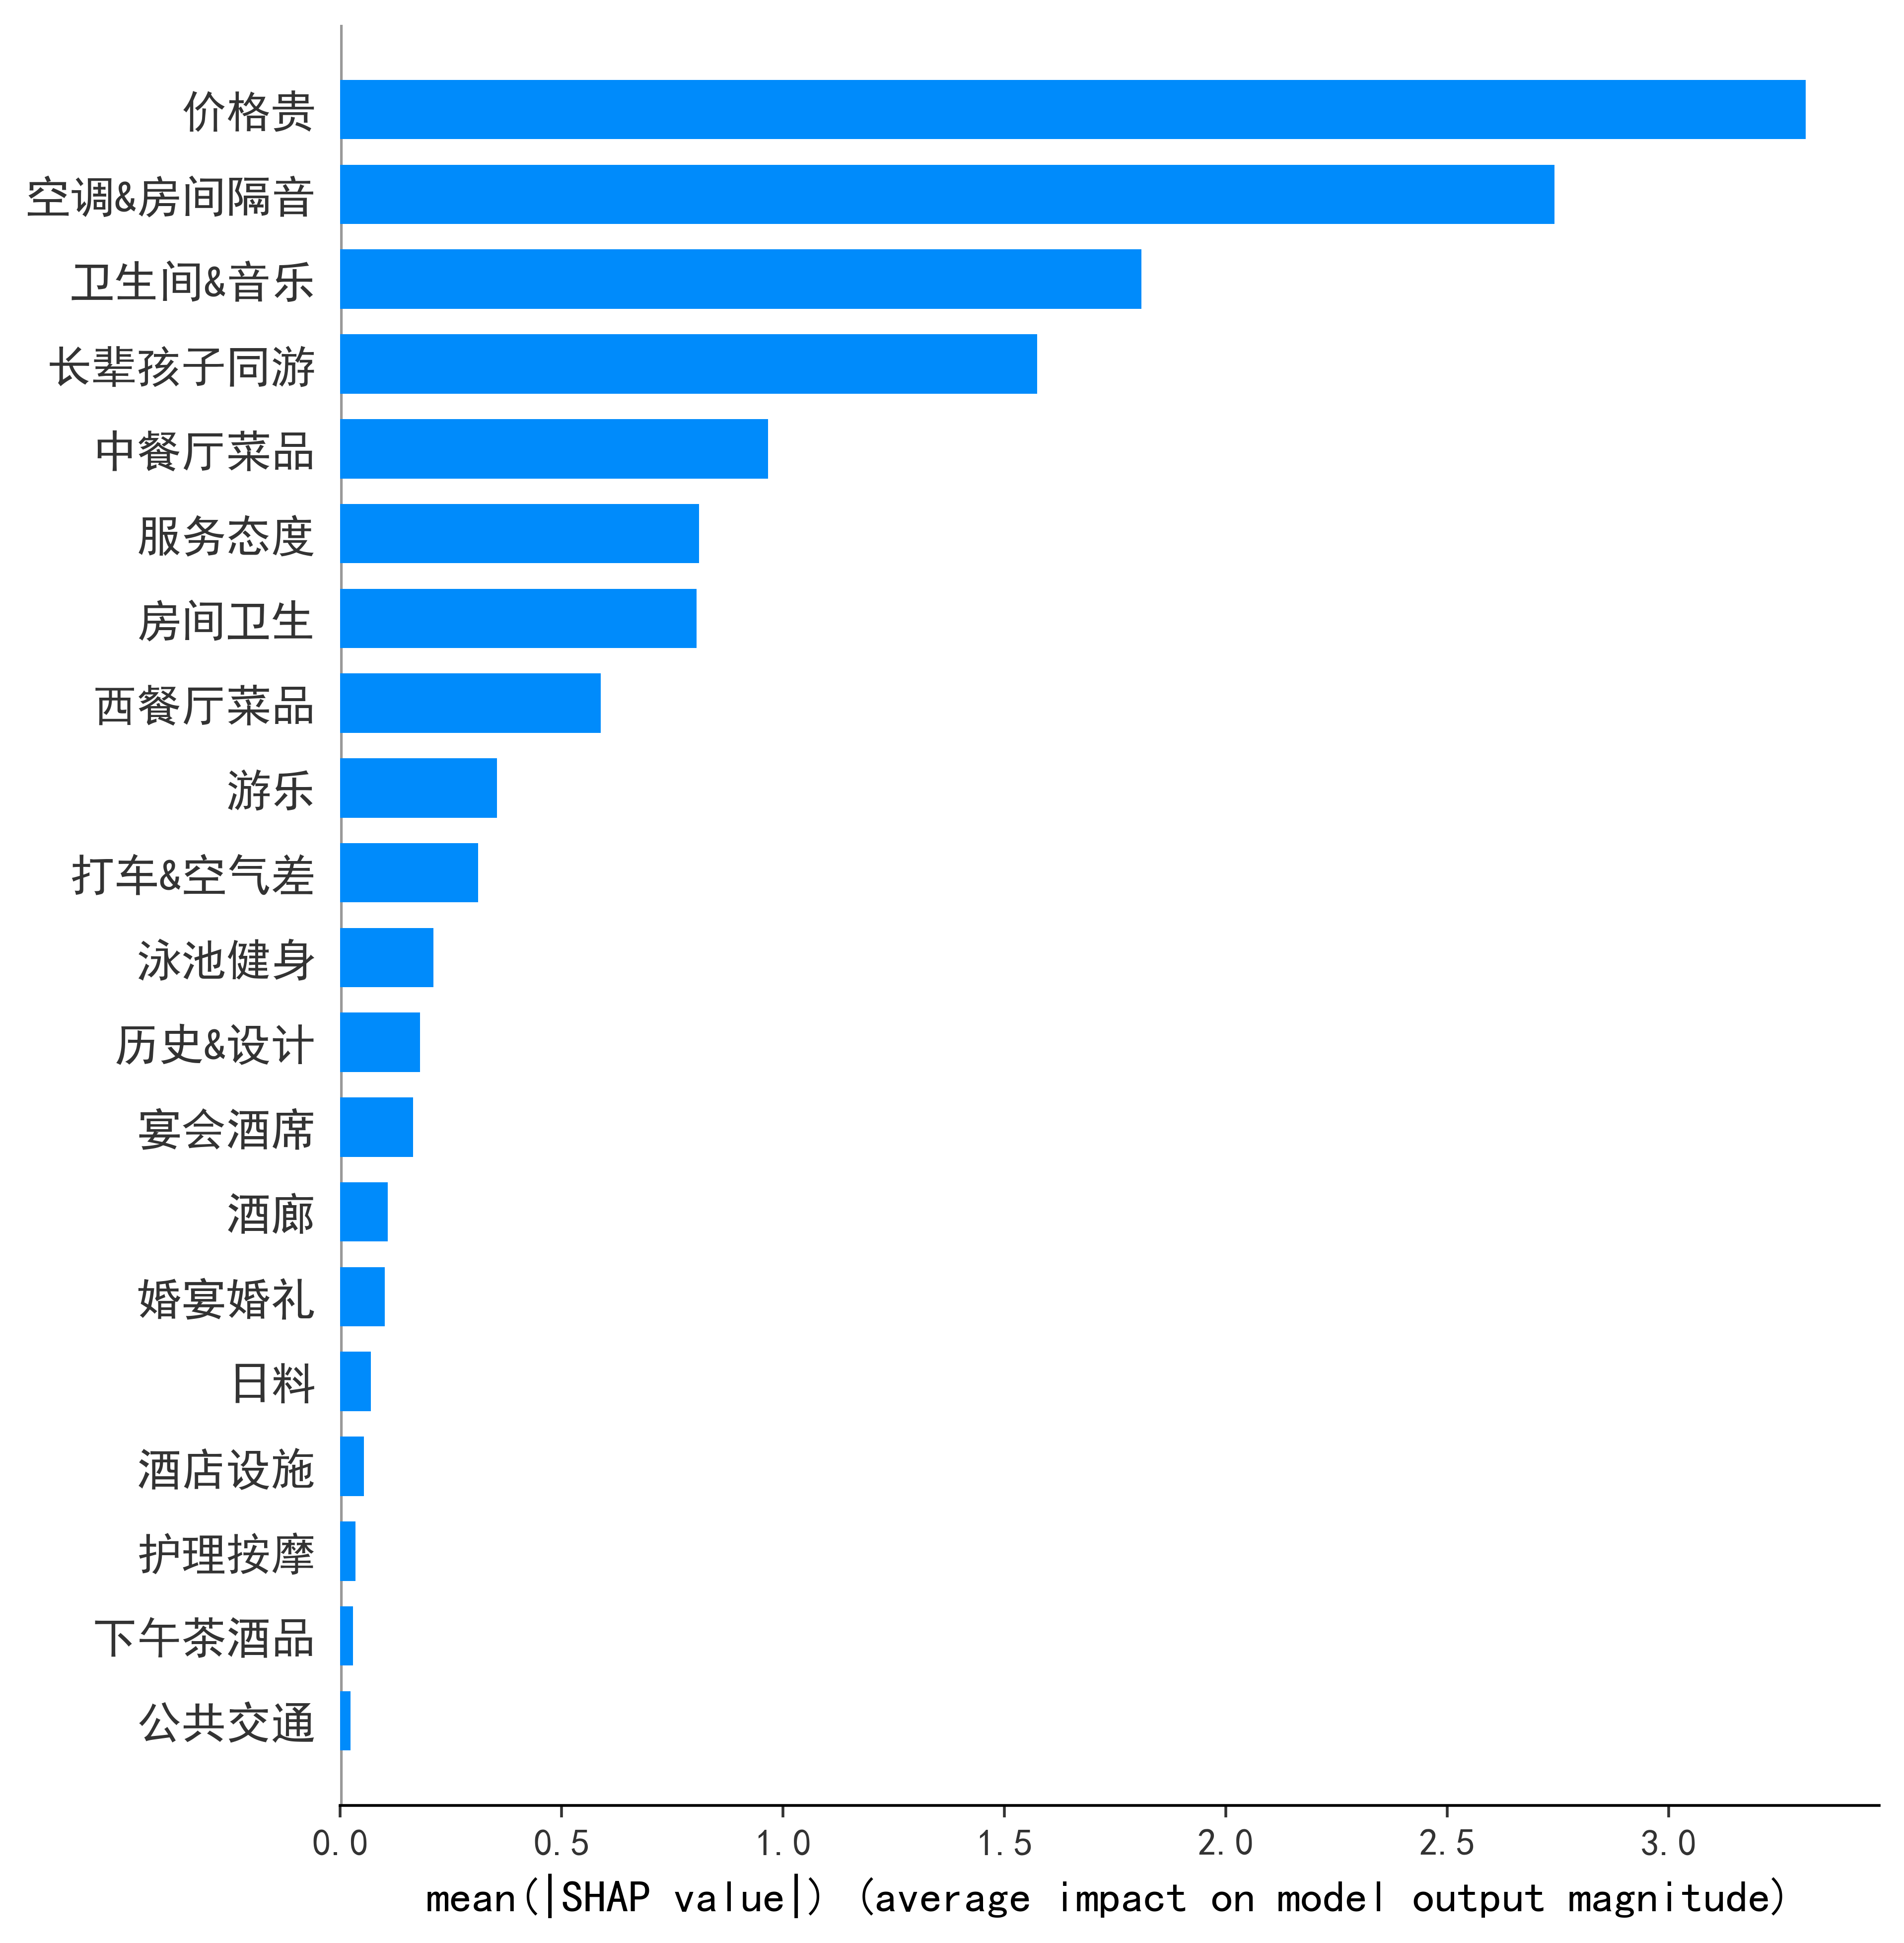

In [17]:
pl.figure(dpi=500)
shap.summary_plot(shap_values,X_test,plot_type='bar')

价格贵


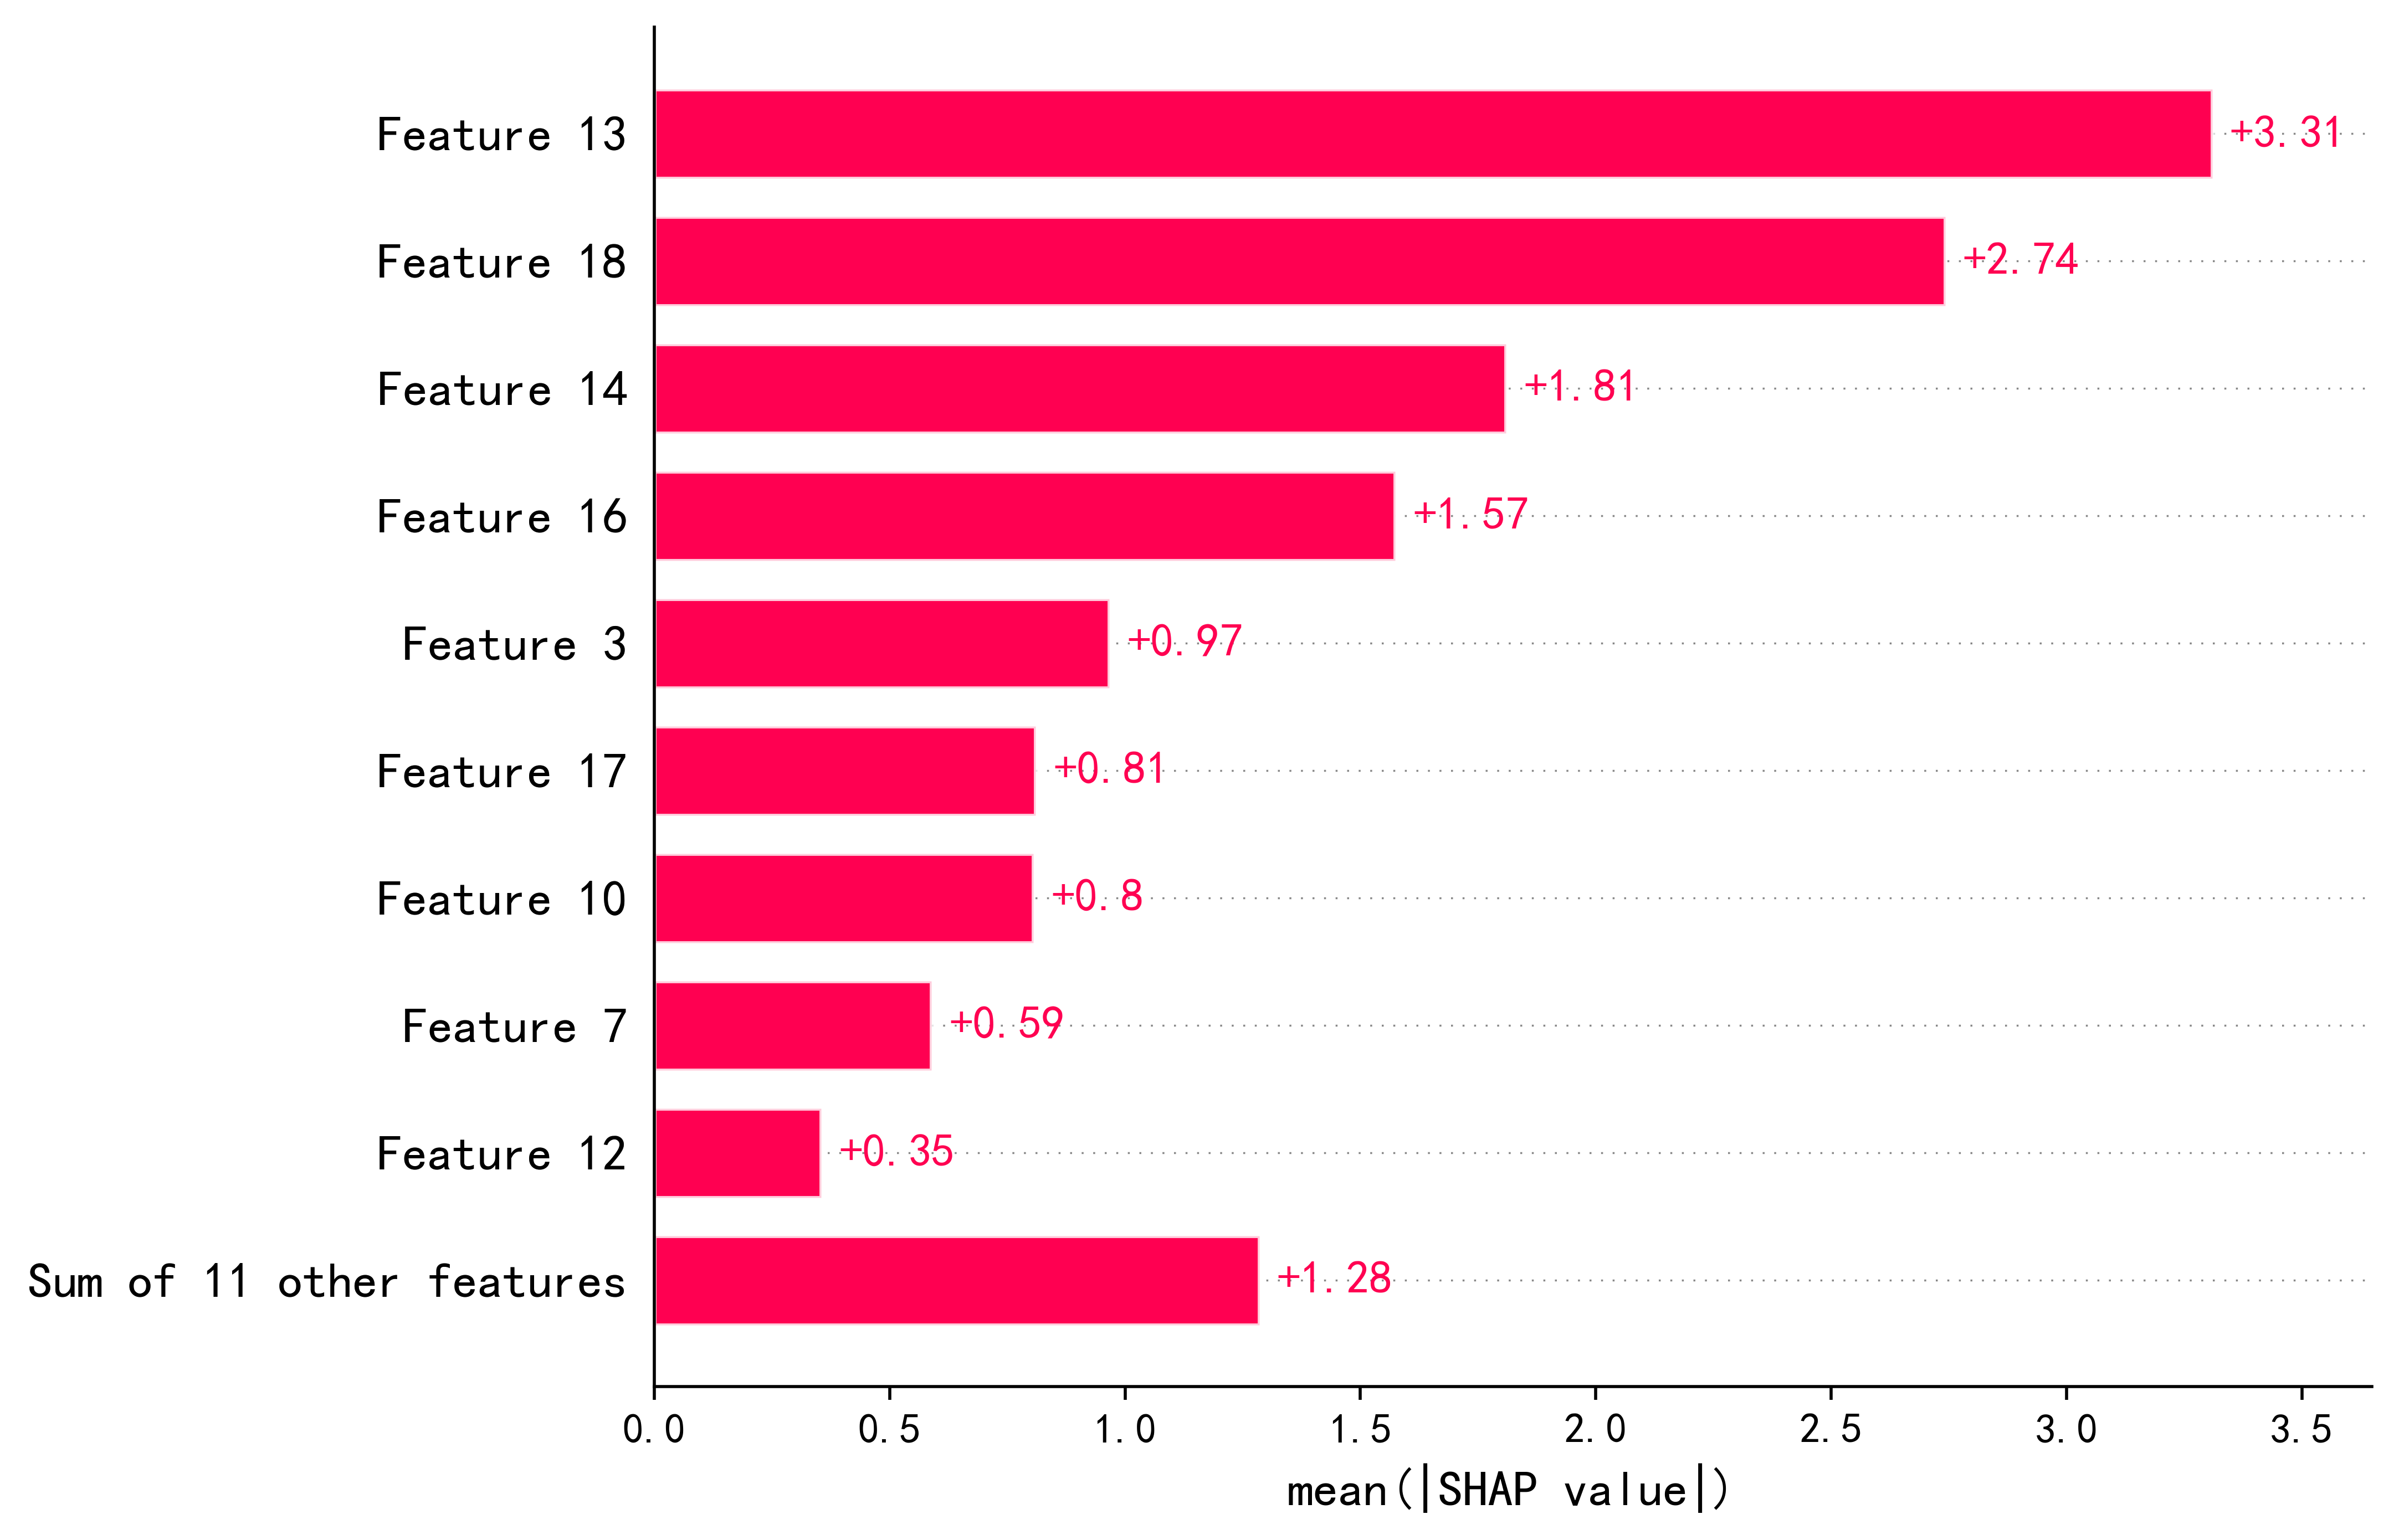

In [18]:
pl.figure(dpi=500)
print(rd.columns[13])
shap.plots.bar(shap_values)

可以看出SMOTE采样后，对于负类的识别正确率仅为升至75%，模型的泛化性有了明显的提升。

# 2.支持向量分类器（SVC）

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# svc=Pipeline(
#     [
#         ('std',StandardScaler()),
#         ('svc',SVC())
#     ]
# )
# logit=LogisticRegression()
# for i in range(1,4):
    # svc.set_params(svc__degree=i)
# std = StandardScaler()
# X_std = std.fit_transform(X_train)
# for i in range(1,4):
svc = SVC(degree=3,kernel='linear')
svc.fit(X_train,y_train)
# print('=================degree:',i,'=================')
print('测试集上的得分：',svc.score(X_test,y_test))
print('测试集上负例的得分：',svc.score(X_test_neg,y_test[y_test==-1]))

X has feature names, but SVC was fitted without feature names


测试集上的得分： 0.852705991424267
测试集上负例的得分： 0.6886792452830188


X has feature names, but SVC was fitted without feature names


In [18]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
import joblib
joblib.dump(svc, R'E:\code\python_code\BDManager\sunshaolong\model\svc采样后.model')

['E:\\code\\python_code\\BDManager\\sunshaolong\\model\\svc采样后.model']

In [13]:
svc = joblib.load(R'E:\code\python_code\BDManager\sunshaolong\model\svc采样后.model')


In [20]:
import shap
import matplotlib.pyplot as pl
# 解决中文显示问题
pl.rcParams['font.sans-serif'] = ['SimHei']
pl.rcParams['axes.unicode_minus'] = False
# X_train_summary = shap.kmeans(X_train, 5)
explainer = shap.Explainer(svc.predict, X_train[:100,:])
shap_values = explainer.shap_values(X_test)
# cmap=['red','blue']
# pl.figure(dpi=500)
# pl.title('支持线性分类器SHAP')
# shap.summary_plot(shap_values, X_test,plot_size=(20,30))

Permutation explainer:  64%|██████▍   | 5556/8629 [14:49:30<9:20:19, 10.94s/it] 

KeyboardInterrupt: 

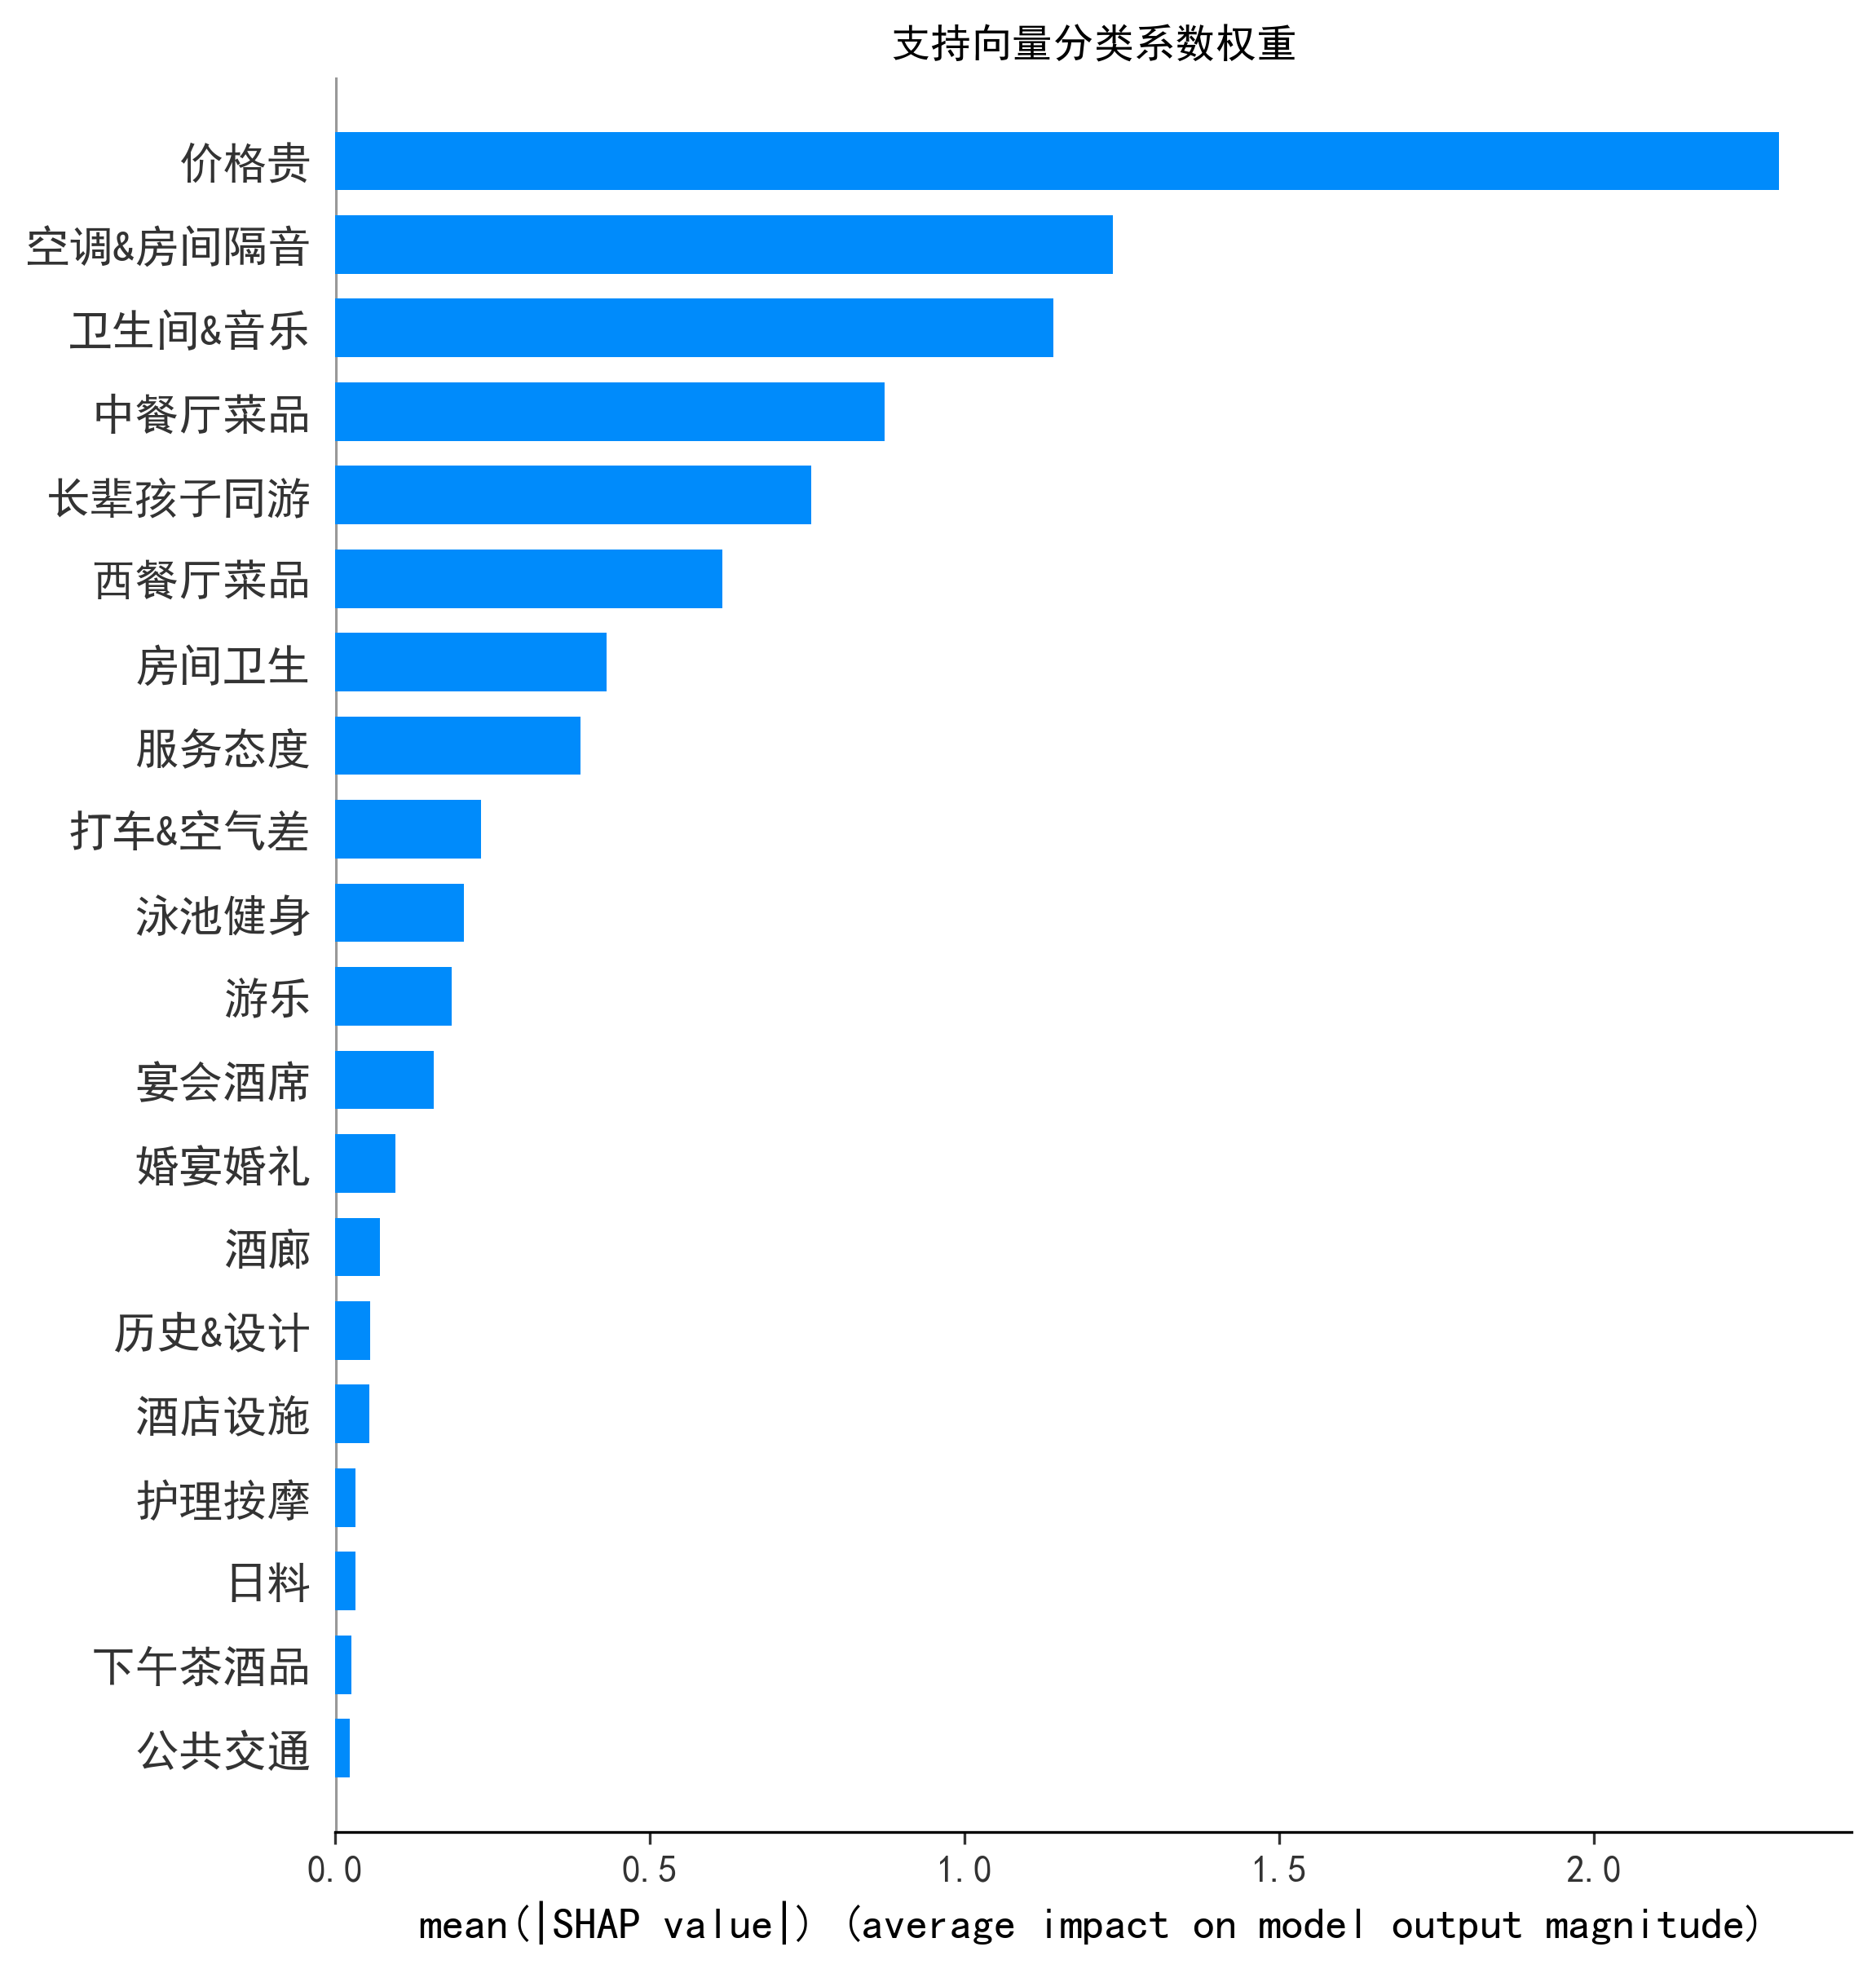

<Figure size 432x288 with 0 Axes>

In [20]:
pl.figure(dpi=300)
pl.title('支持向量分类系数权重')
shap.summary_plot(shap_values, X, plot_type="bar")
pl.savefig(R"E:\code\python_code\BDManager\sunshaolong\tripadvisor_code\image\支持向量分类SHAP1.svg",dpi= 300)

# 3.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('测试集上的得分：',dt.score(X_test,y_test))
print('测试集上负例的得分：',dt.score(X_test_neg,y_test[y_test==-1]))


测试集上的得分： 0.908564144165025
测试集上负例的得分： 0.18867924528301888


X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names


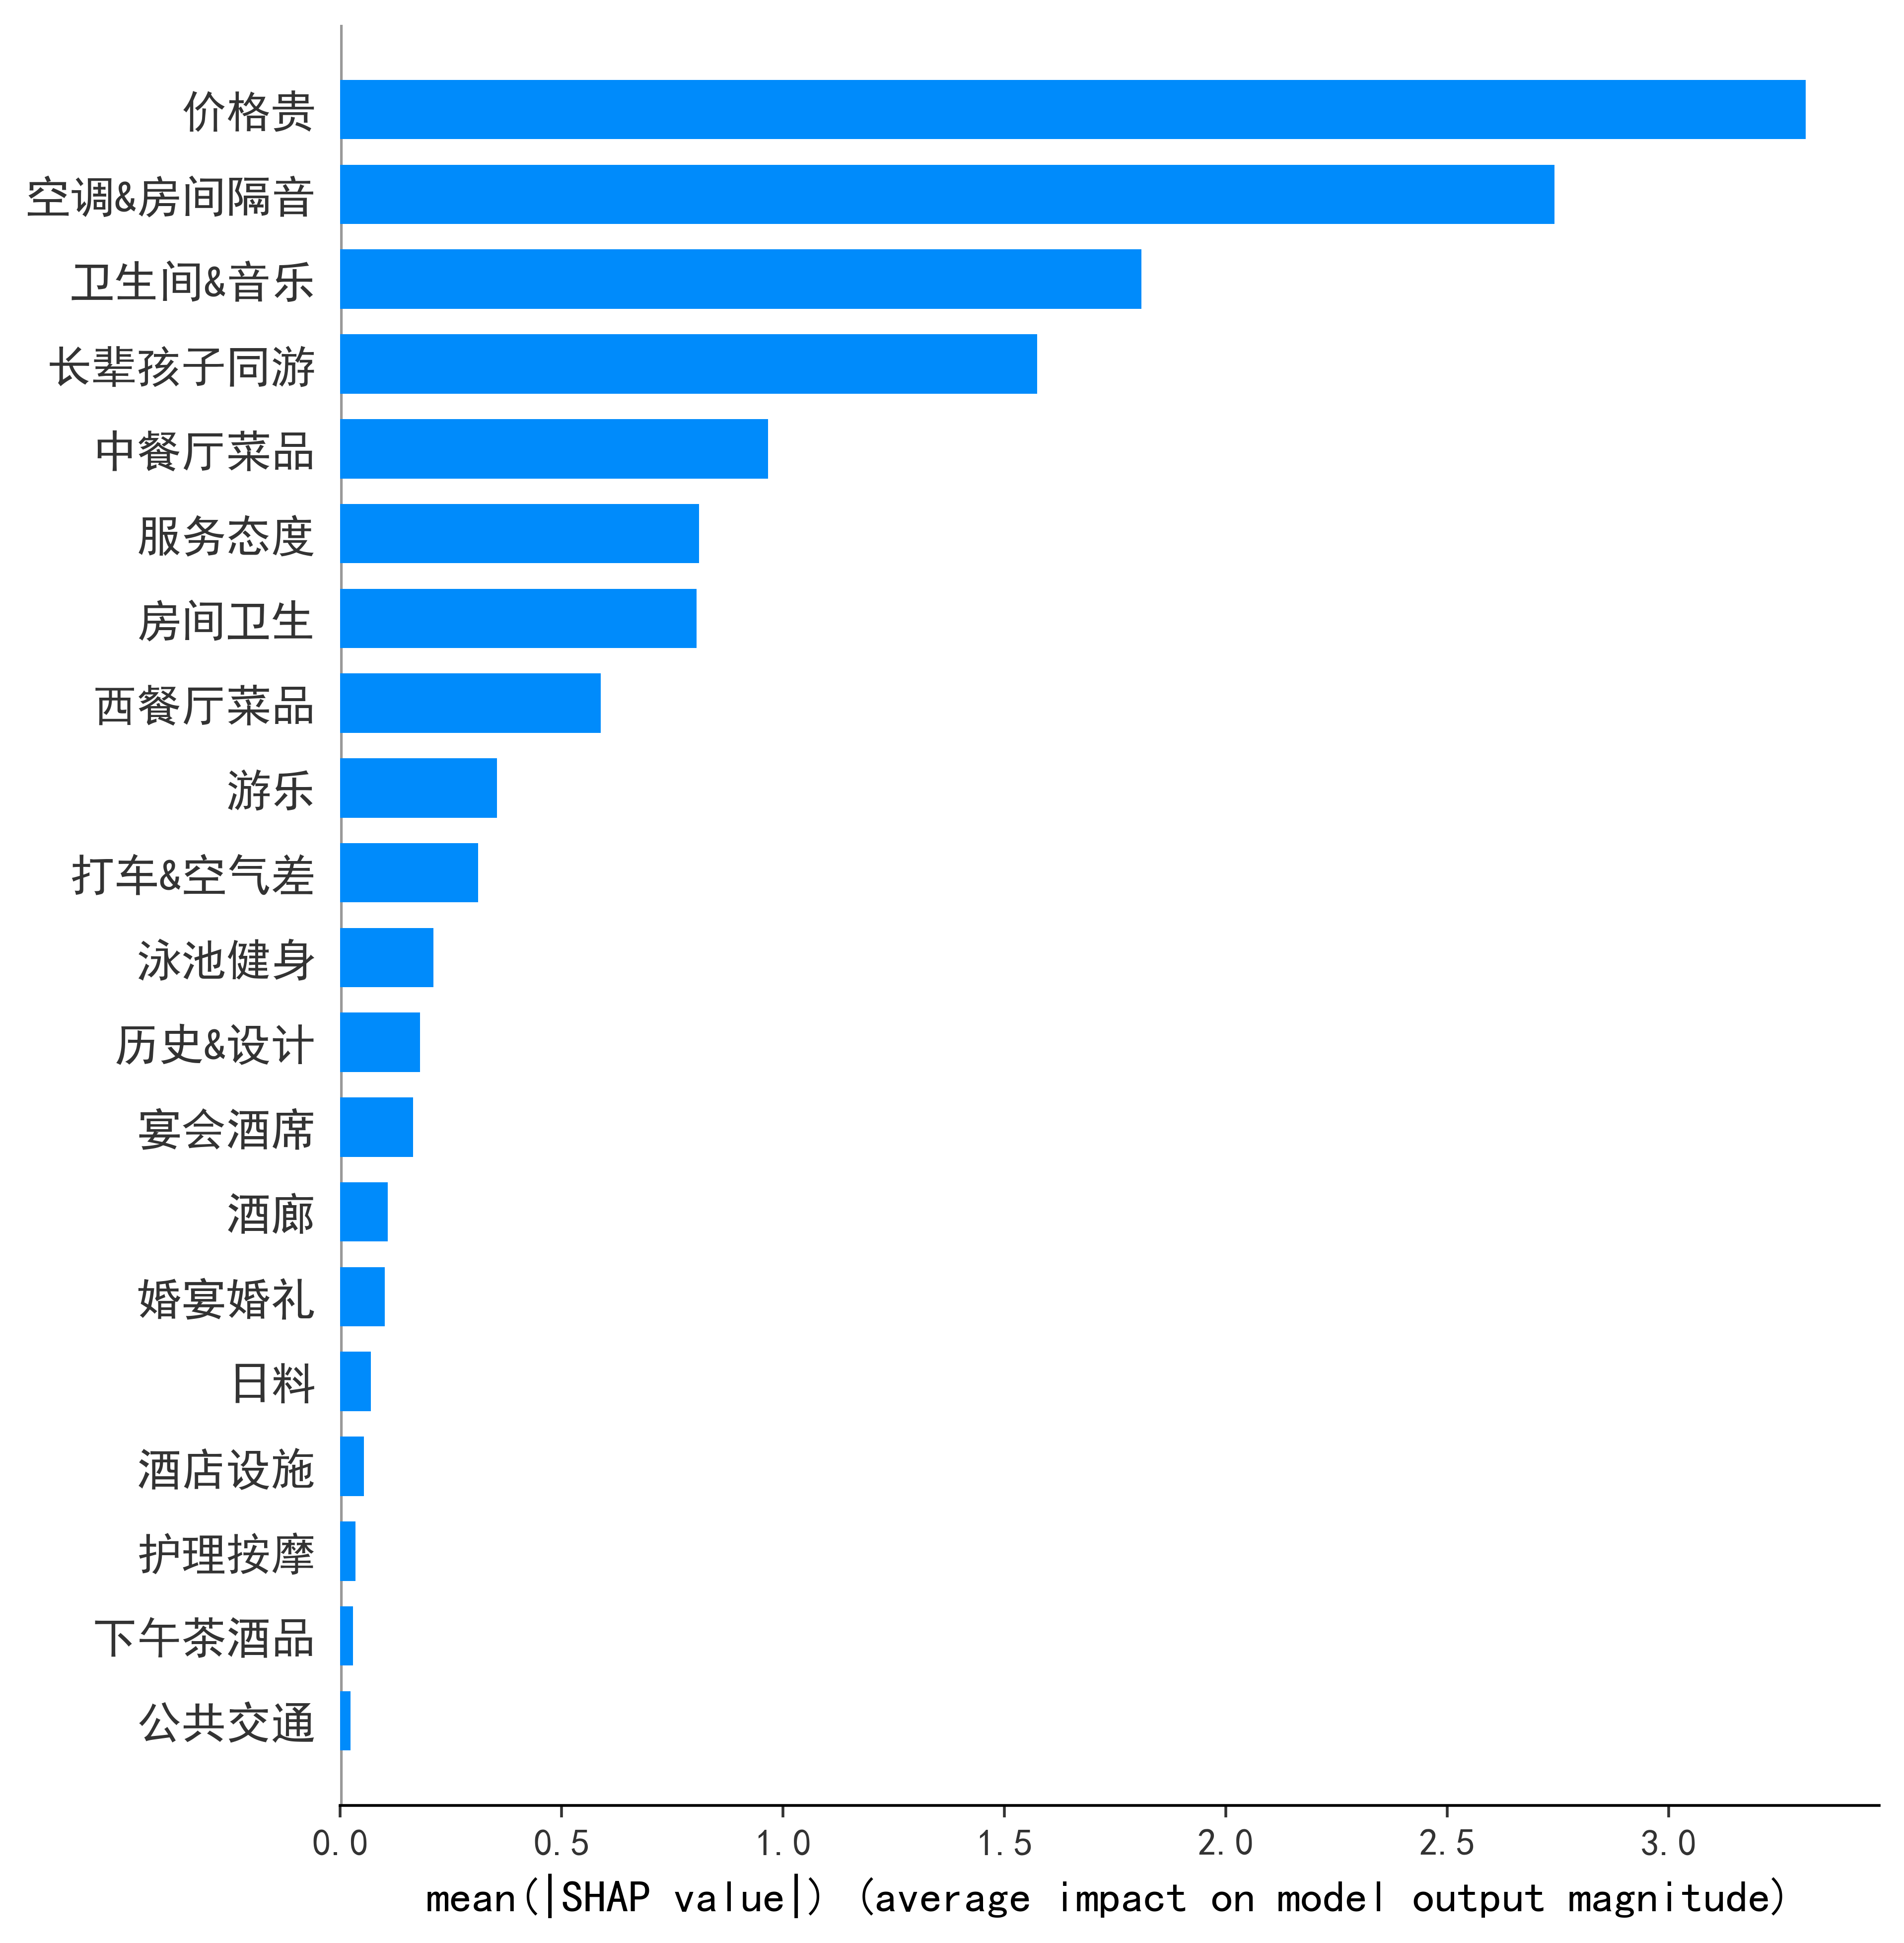

In [21]:
pl.figure(dpi=500)
shap.summary_plot(shap_values, X, plot_type="bar")

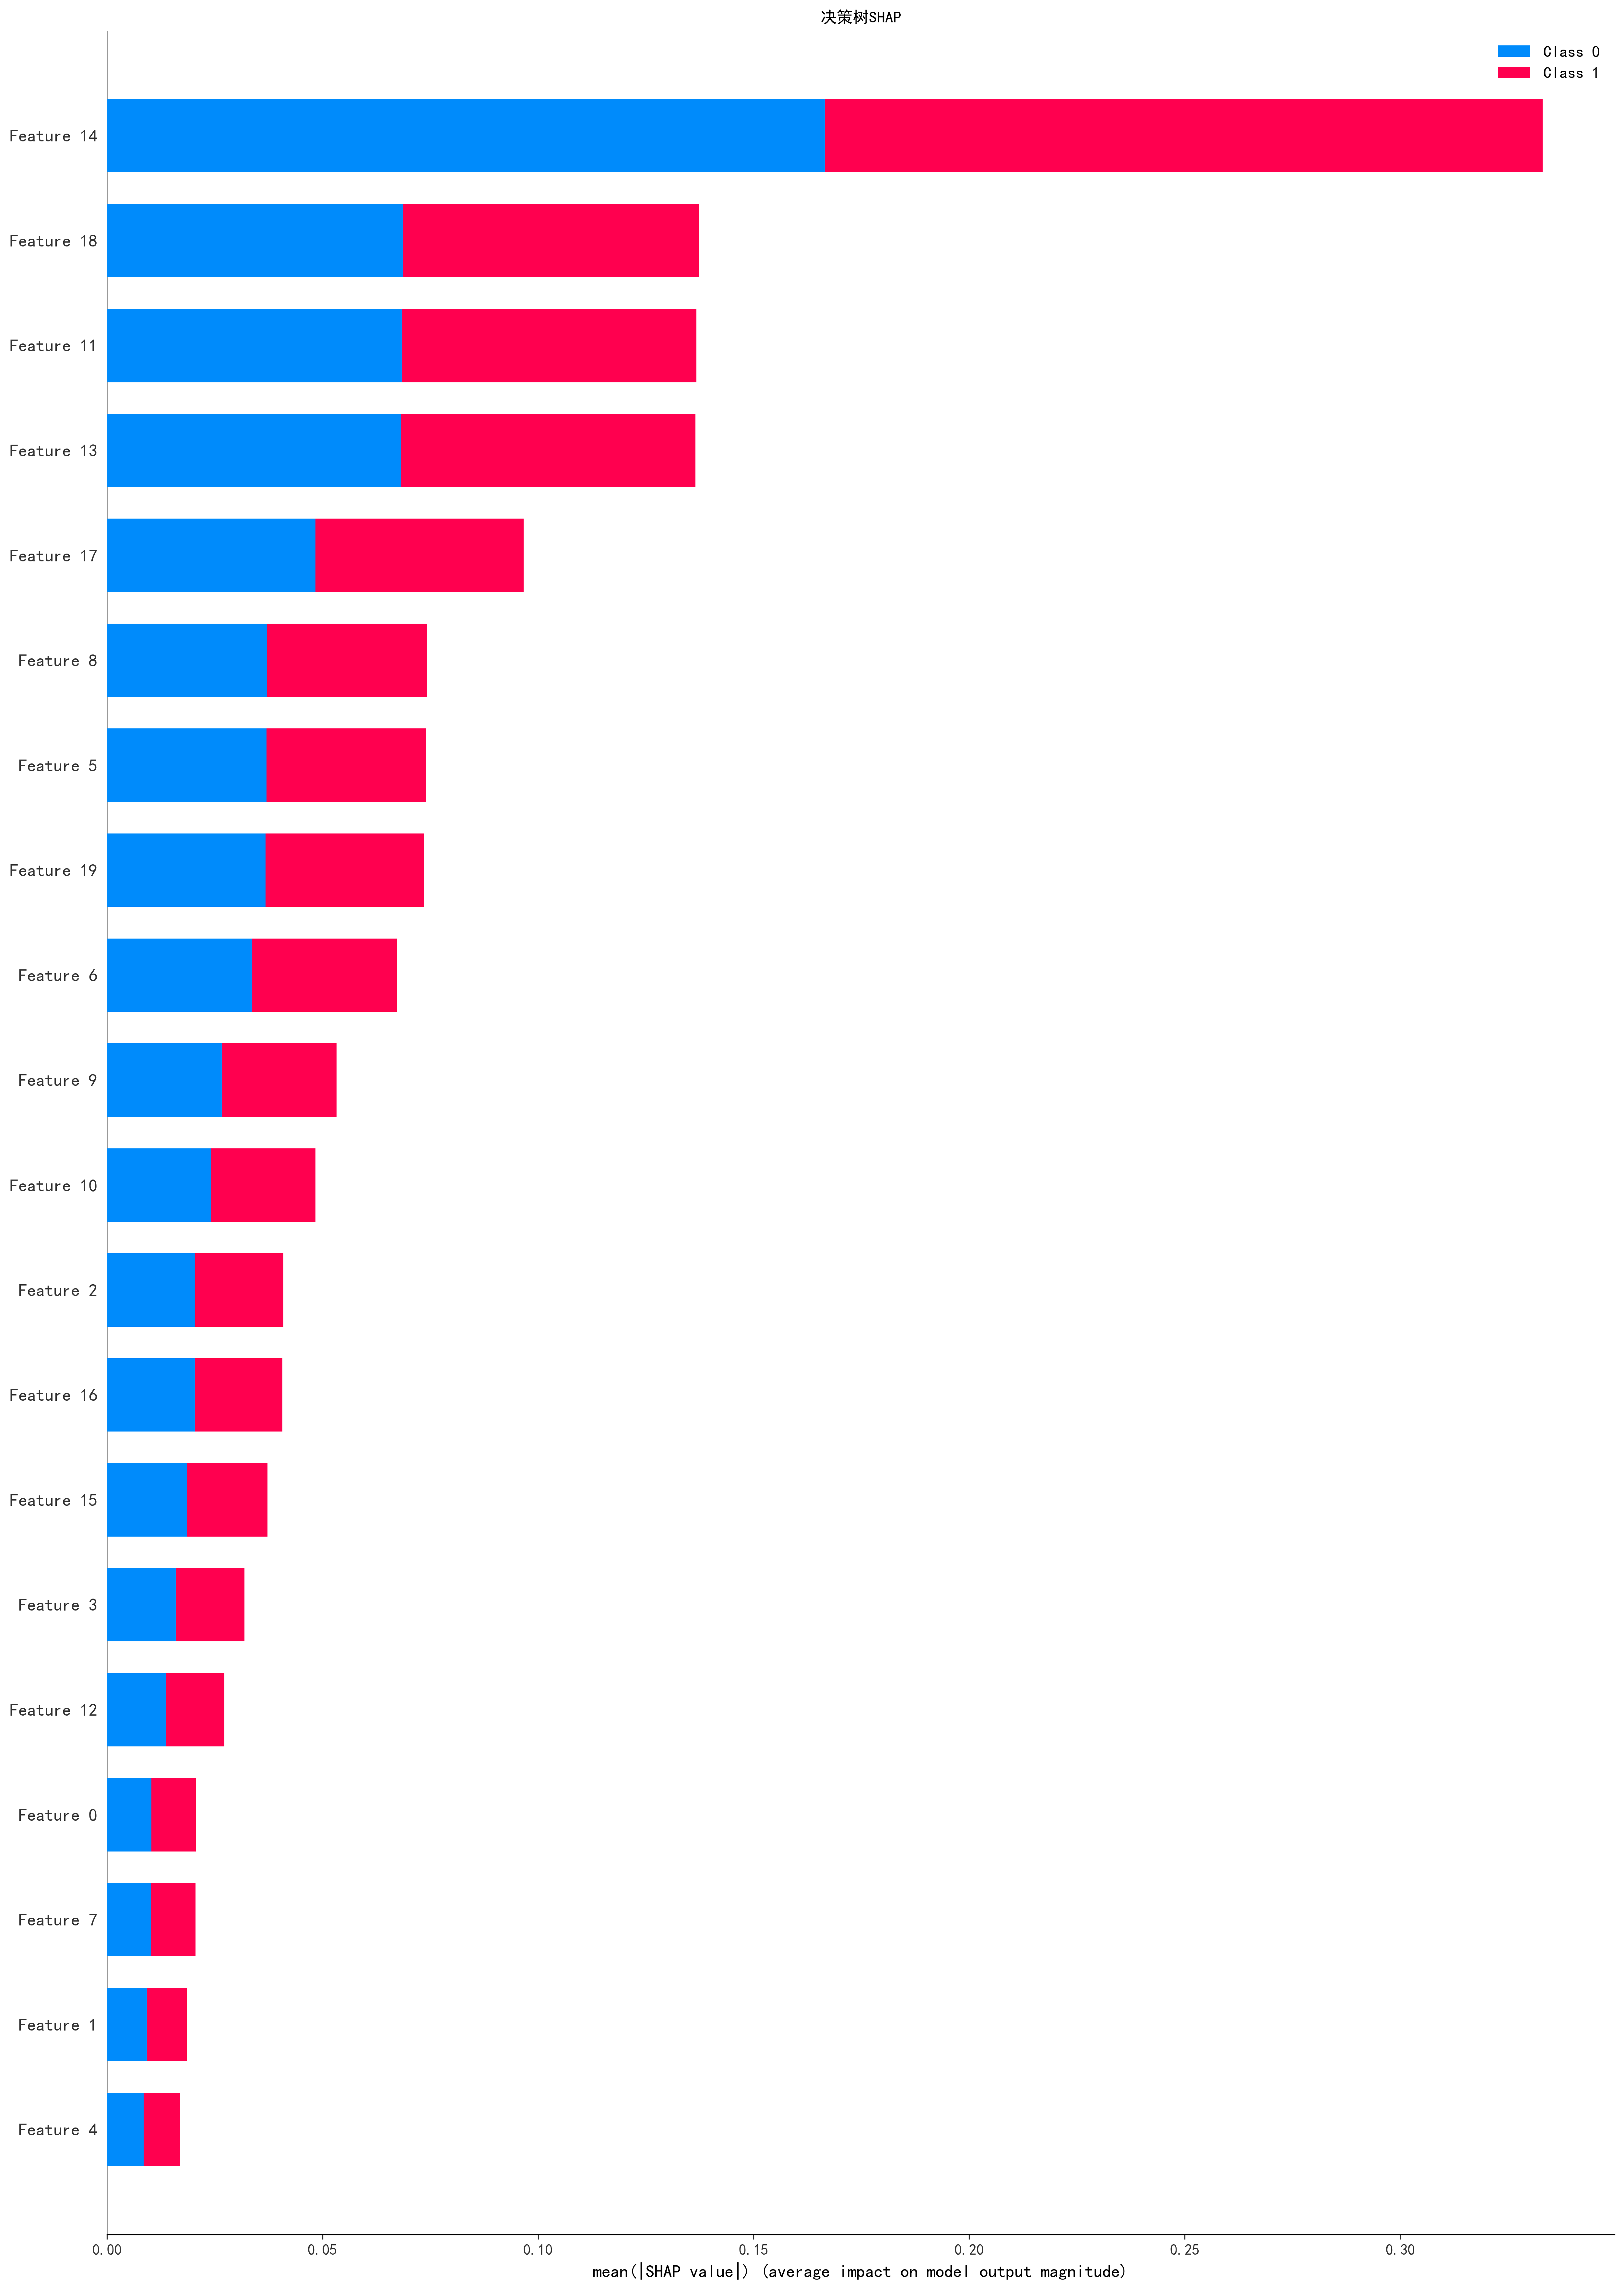

In [22]:
import shap
import matplotlib.pyplot as pl
# 解决中文显示问题
pl.rcParams['font.sans-serif'] = ['SimHei']
pl.rcParams['axes.unicode_minus'] = False
explainer = shap.TreeExplainer(dt)
shap_values_dt = explainer.shap_values(X_train)
# cmap=['red','blue']
pl.figure(dpi=500)
pl.title('决策树SHAP')
shap.summary_plot(shap_values_dt, X_train)

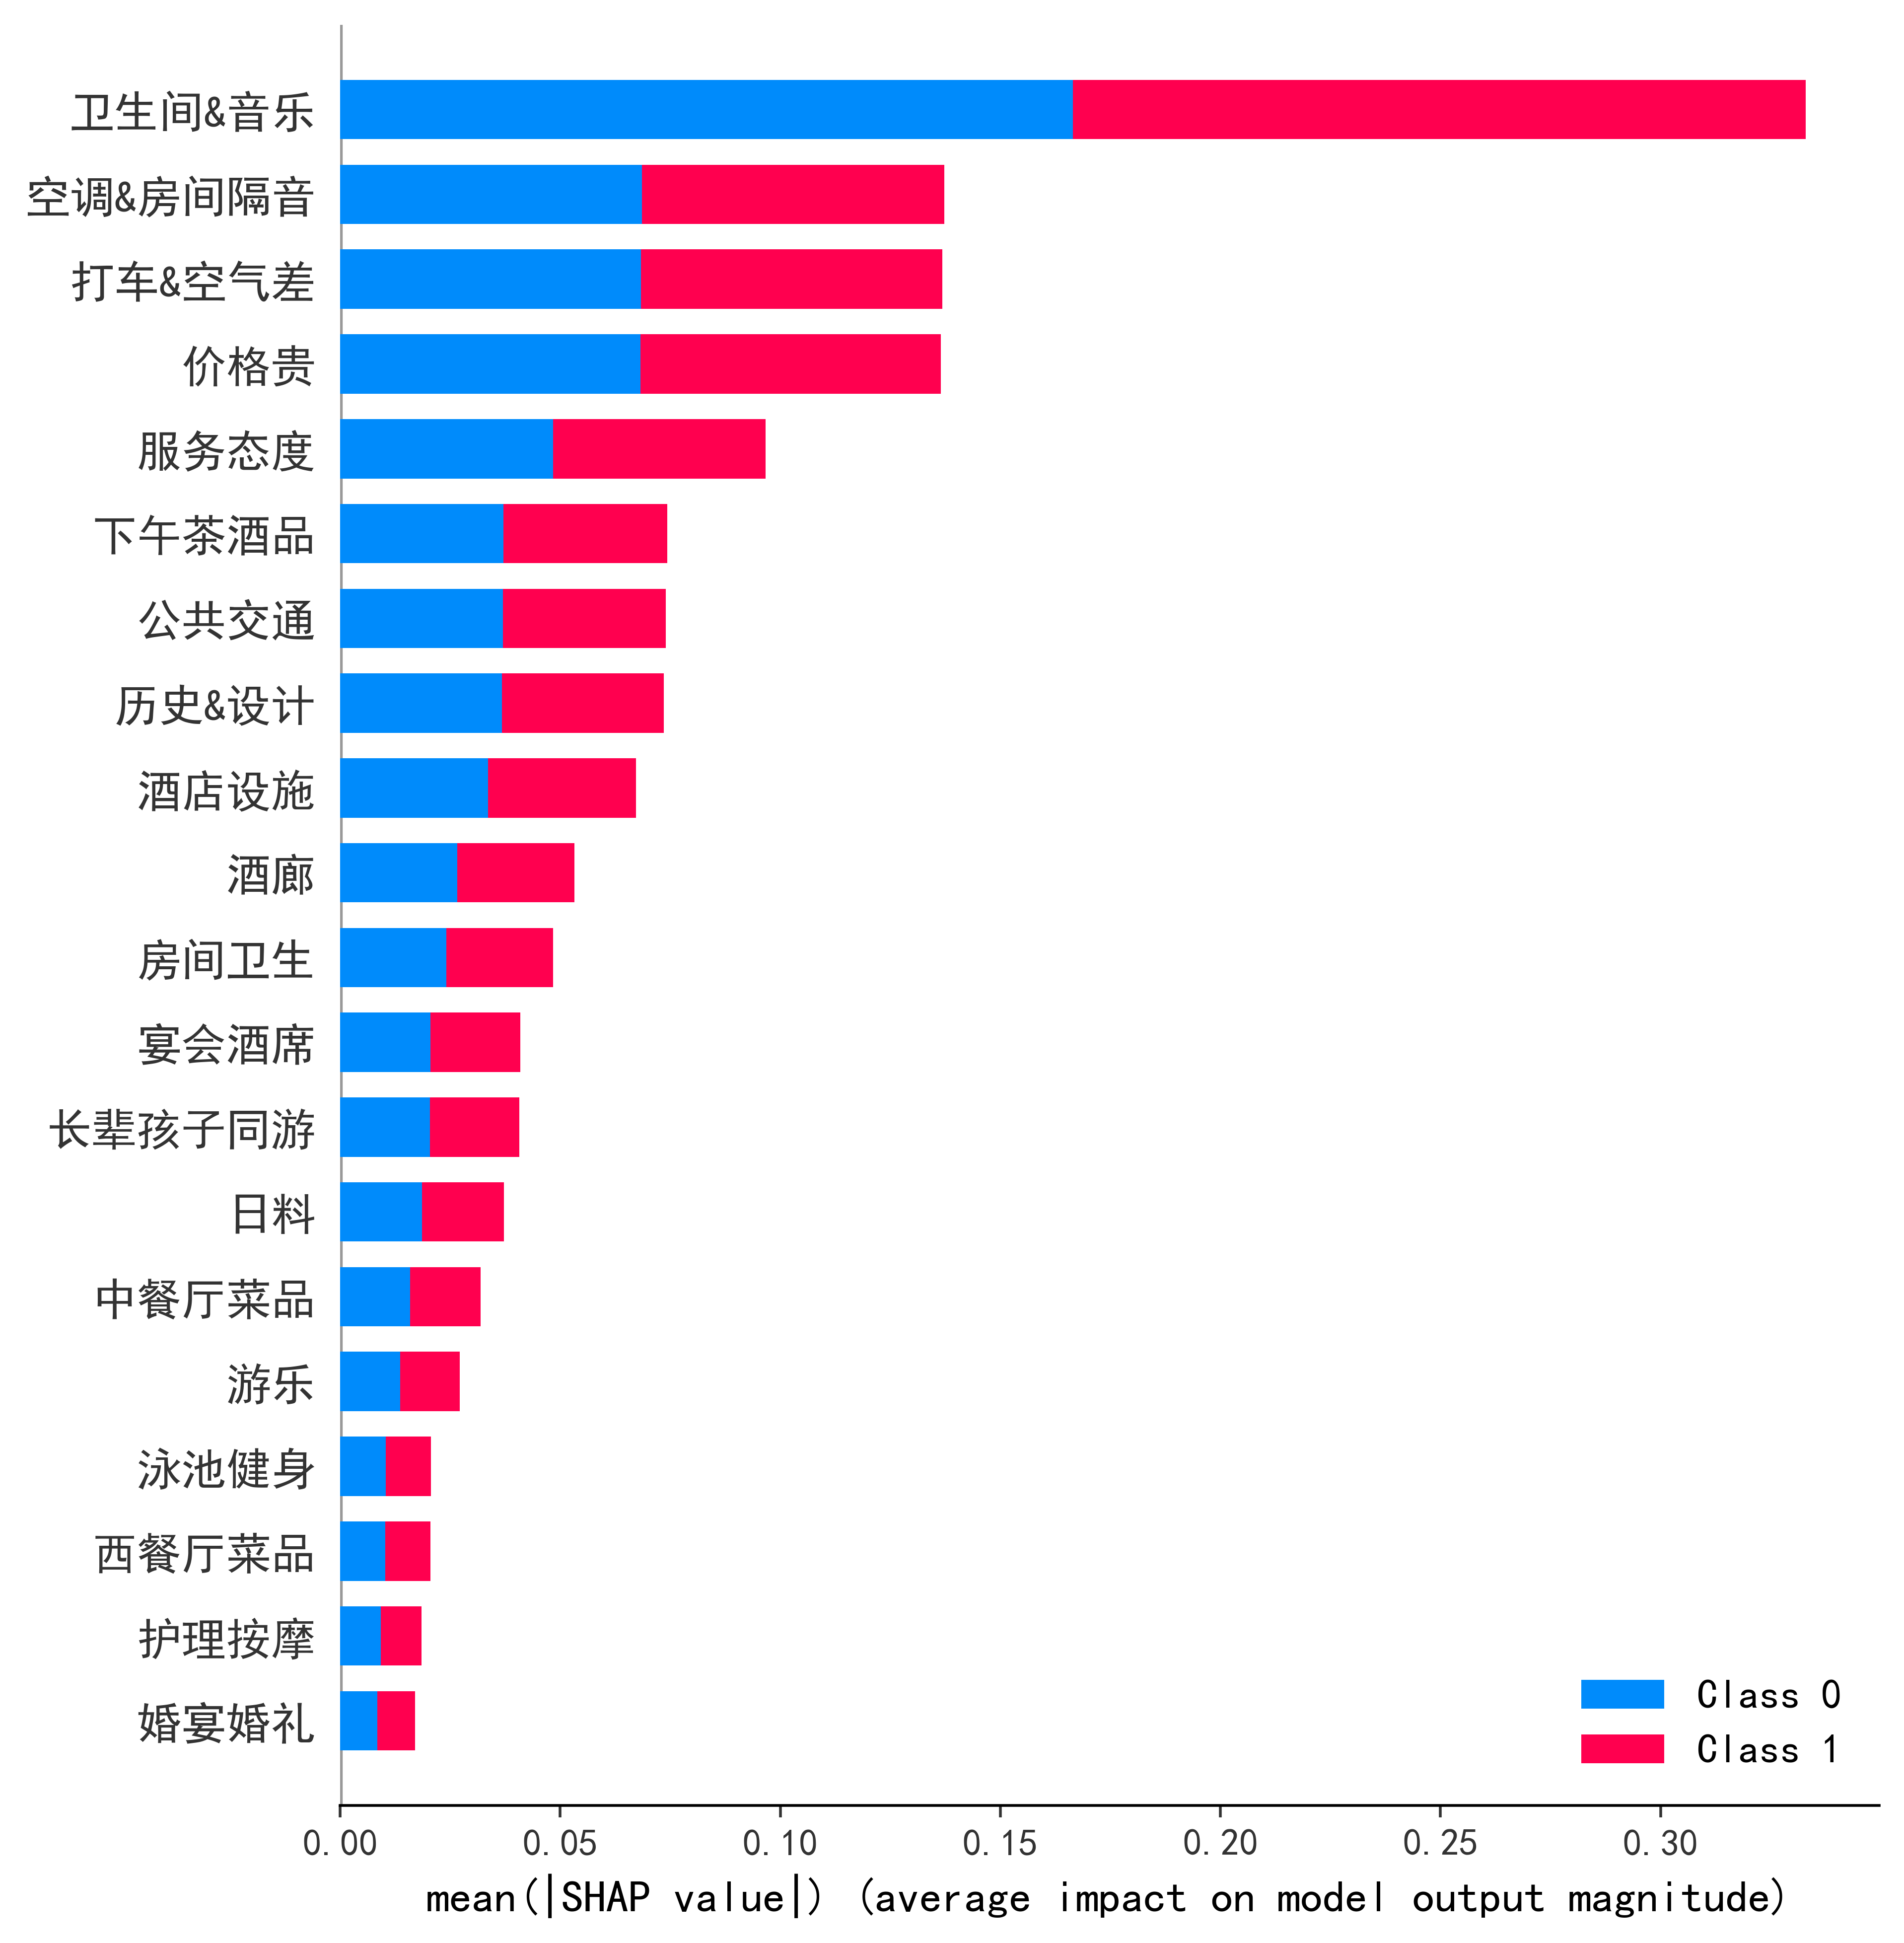

In [24]:
pl.figure(dpi=500)
shap.summary_plot(shap_values_dt, X_train,feature_names=X.columns)


# 4.RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
print('测试集上的得分：',rfc.score(X_test,y_test))
print('测试集上负例的得分：',rfc.score(X_test_neg,y_test[y_test==-1]))
rfc.feature_importances_

X has feature names, but RandomForestClassifier was fitted without feature names


测试集上的得分： 0.9235137327616177
测试集上负例的得分： 0.03773584905660377


X has feature names, but RandomForestClassifier was fitted without feature names


array([0.01925919, 0.01708175, 0.03728194, 0.01936408, 0.02726944,
       0.066937  , 0.06902128, 0.02027818, 0.02430744, 0.02542826,
       0.02718183, 0.14330239, 0.04976367, 0.10944056, 0.1457255 ,
       0.02837234, 0.04084514, 0.04092898, 0.06145549, 0.02675555])

In [47]:
a= pd.DataFrame(zip(X.columns,rfc.feature_importances_),columns=['因子','权重']).set_index('因子')
a

,权重
因子,
泳池健身,0.019259
护理按摩,0.017082
宴会酒席,0.037282
中餐厅菜品,0.019364
婚宴婚礼,0.027269
公共交通,0.066937
酒店设施,0.069021
西餐厅菜品,0.020278
下午茶酒品,0.024307


<AxesSubplot:ylabel='因子'>

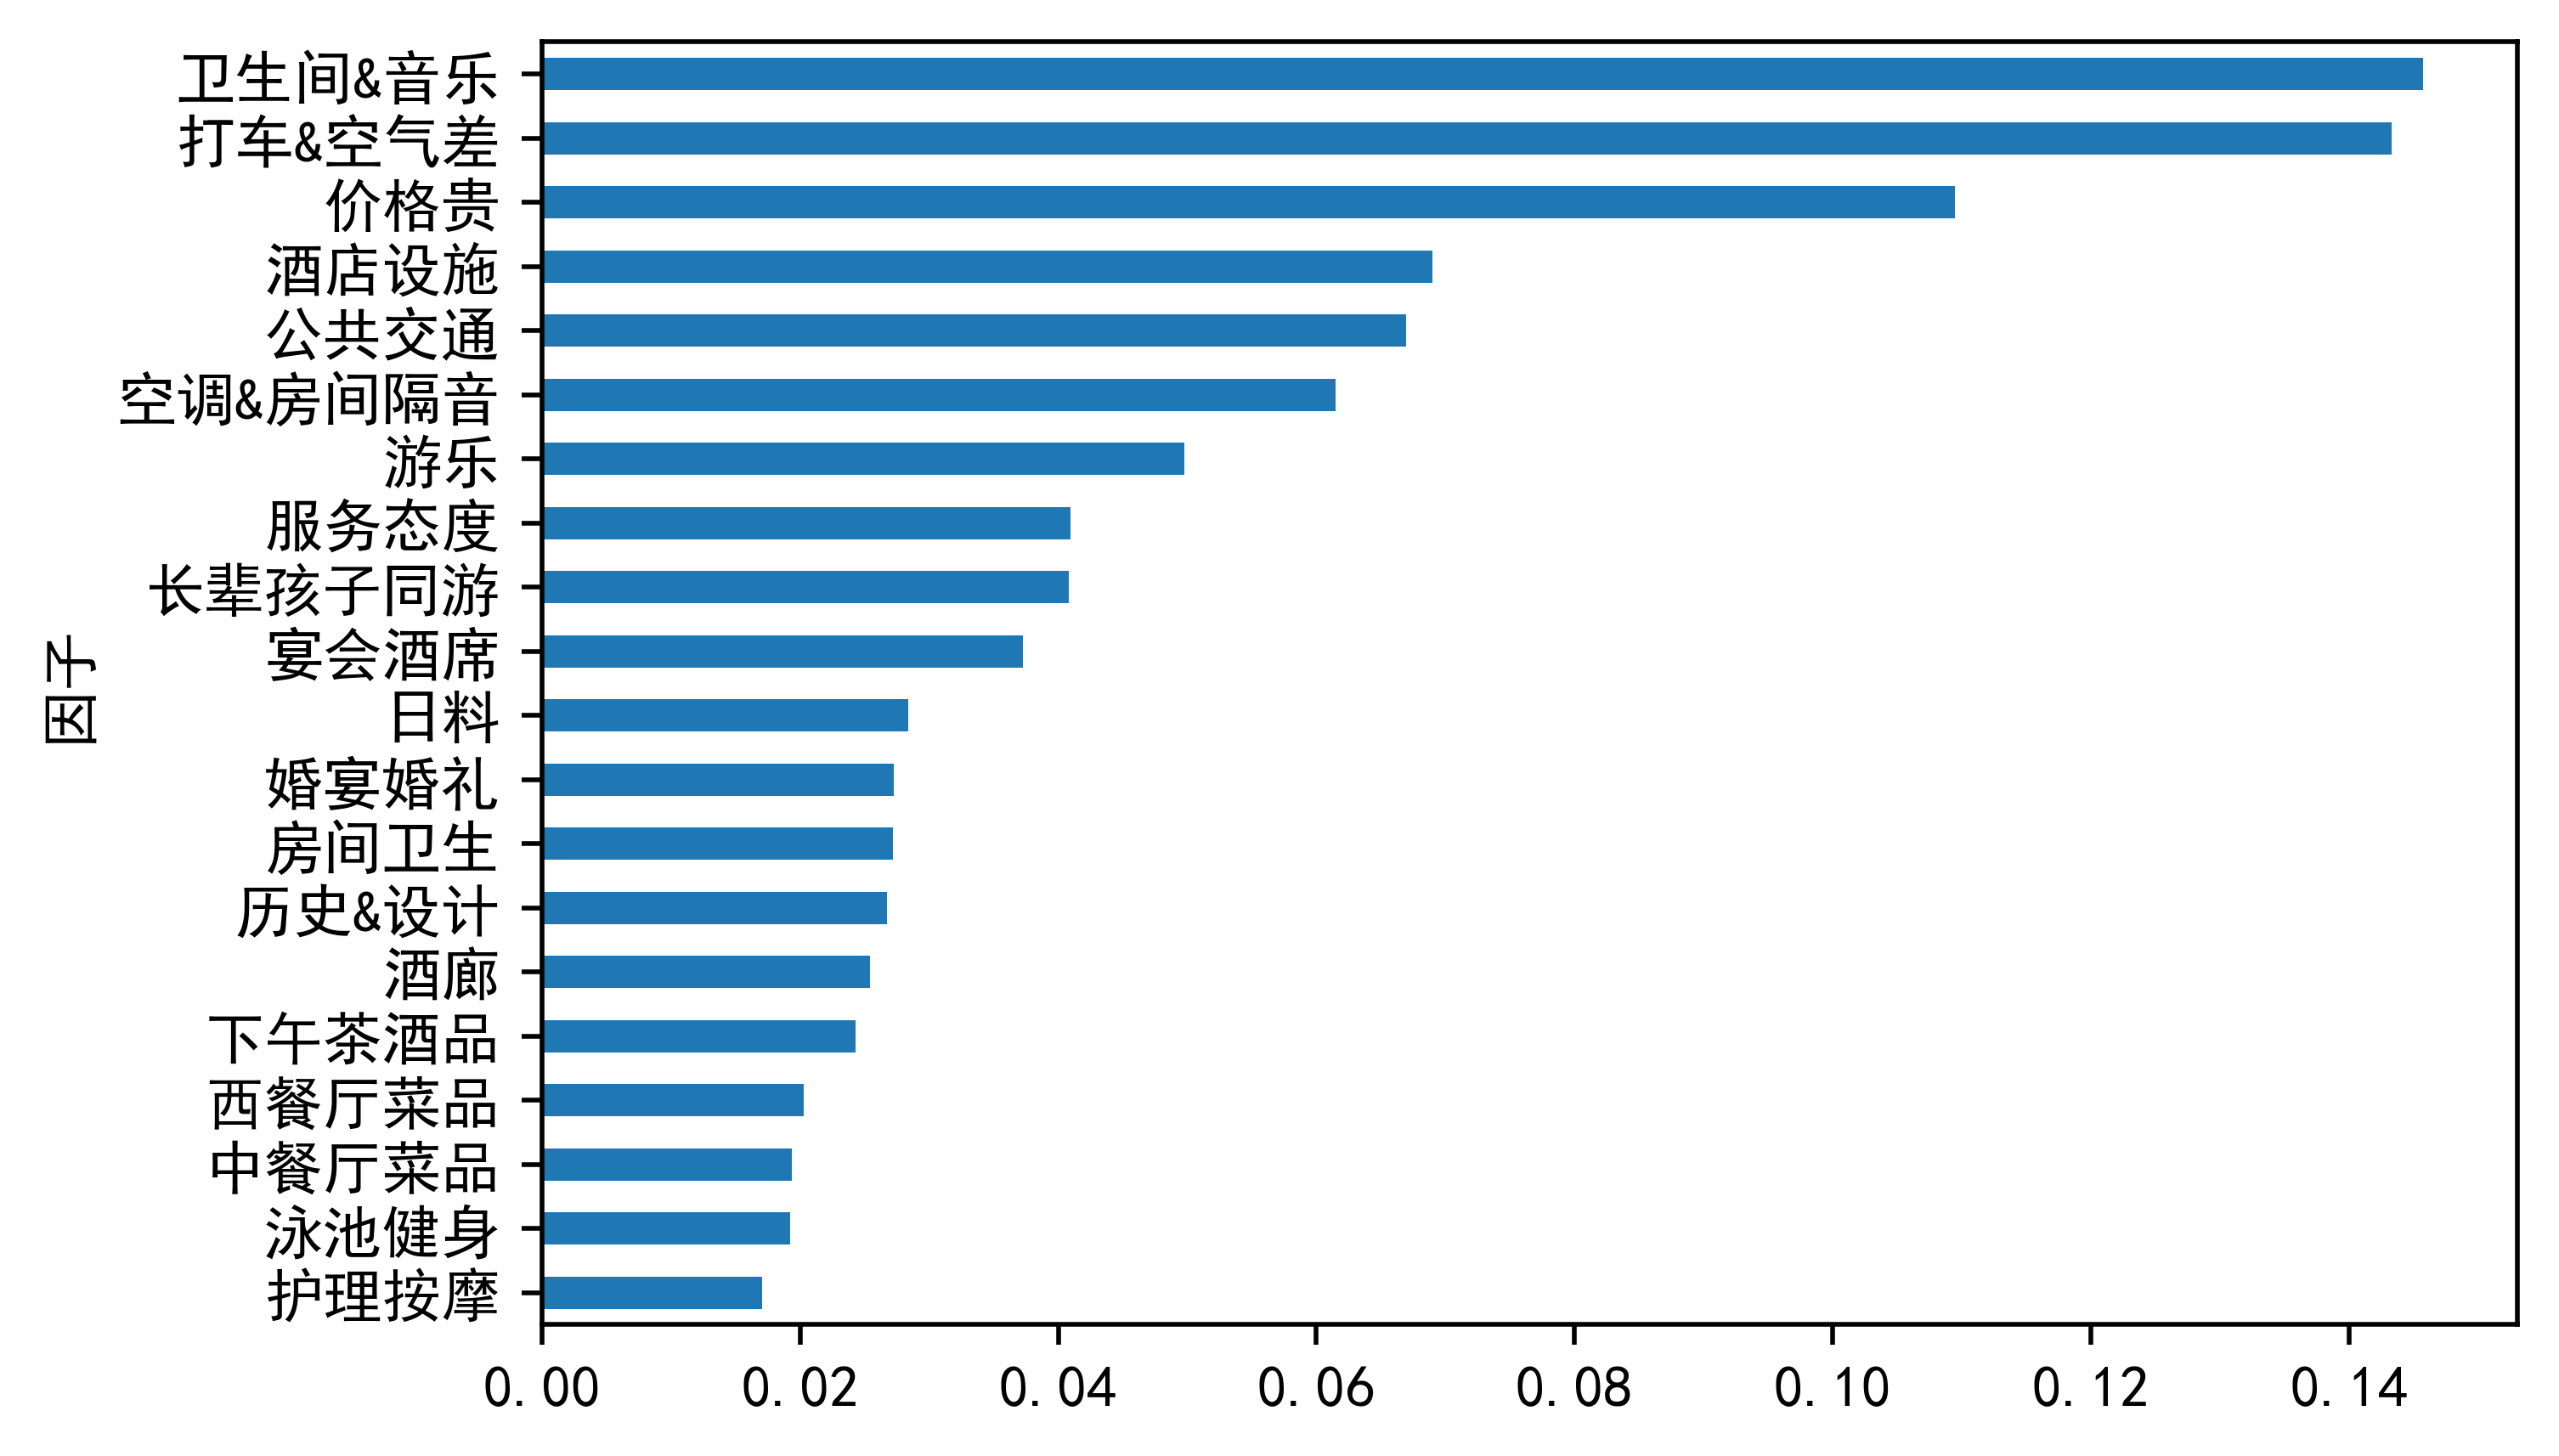

In [49]:
pl.figure(dpi=500)
# pl.ylabel('')
a['权重'].sort_values().plot(kind='barh')

In [30]:
import shap
import matplotlib.pyplot as pl
# 解决中文显示问题
pl.rcParams['font.sans-serif'] = ['SimHei']
pl.rcParams['axes.unicode_minus'] = False
explainer = shap.TreeExplainer(rfc.base_estimator_)
shap_values = explainer.shap_values(X_train)
# cmap=['red','blue']
pl.figure(dpi=500)
pl.title('随机森林SHAP')
shap.summary_plot(shap_values, X_train,feature_names=X.columns)

# 5.CNN


In [7]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
# F.max_pool2d()

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class  Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__() # 继承Net子类的超类nn.Module
        # 卷积层 1表示输入为单通道，6表示输出通道数，5表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层/全联接层/线性层
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        #卷积—>激活—>池化
        x=F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x=F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape ,’-1’表示自适应
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net) 

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [15]:
b=t.arange(10)
b.resize_(2,5)


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [32]:
b.unsqueeze_(2)
# b=b.view(2,5)
b.shape

torch.Size([2, 5, 1, 1, 1, 1, 1, 1])

In [32]:
import torch as t
a=t.arange(12).resize(2,2,3)
a[:,1,:]

tensor([[ 3,  4,  5],
        [ 9, 10, 11]])

In [25]:
a.gather(2,t.LongTensor([[[2,1],
                            [0,2],
                            ],[[0,1],[0,1]]]))

tensor([[[ 2,  1],
         [ 3,  5]],

        [[ 6,  7],
         [ 9, 10]]])

In [36]:
from torch.autograd import Variable
x=Variable(t.ones(4),requires_grad=True)
# x.requires_grad_(True)

In [40]:
y=x**2

In [41]:
z=y*2

In [45]:
z.sum().backward()

In [47]:
x.grad

tensor([4., 4., 4., 4.])

开始搞cnn

In [17]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd

In [19]:
# 定义数据集
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class TopicvecSet(Dataset):
    def __init__(self,filepath = None) -> None:
        super(TopicvecSet, self).__init__()
        data = pd.read_csv(filepath,index_col=0)
        X,y = data.iloc[:,:-1], data.iloc[:,-1]
        self.X = t.from_numpy(X.to_numpy()).float().view(-1,20) # 矩阵类型的
        self.X.requires_grad_(True)
        self.y =  t.from_numpy(y.to_numpy()).float().unsqueeze(1) # 必须是矩阵类型的
        self.len = self.X.shape[0]
    def __getitem__(self, index):
        return t.index_select(self.X,dim=0,index = t.LongTensor([index])), self.y[index]

    def __len__(self):
        return self.len
train_dataset = TopicvecSet('E:\code\python_code\BDManager\sunshaolong\model\smote采样后训练数据.csv') #取训练集
test_dataset = TopicvecSet('E:\code\python_code\BDManager\sunshaolong\model\smote采样后测试数据.csv')
train_loader = DataLoader(dataset =train_dataset, batch_size=128 , shuffle = True) # 
test_loader = DataLoader(dataset= test_dataset, batch_size=128, shuffle= False)

In [20]:
# 定义cnn网络

class myCNN(nn.Module):
    def __init__(self) -> None:
        super(myCNN,self).__init__()
        # 第一层 卷积
        layer1 = nn.Sequential(
            nn.Conv1d(1,16,3,padding=1), #input 1, output 16, k_size 3 -->16, 20, 1
            # print(x.shape),
            nn.ReLU(), #relu acitvate
            nn.MaxPool1d(2) #pool一下 --> 16, 10, 1
        )
        self.layer1 = layer1
        layer2 = nn.Sequential(
            nn.Conv1d(16,32,3,1,1), #--> 32, 10,1
            nn.ReLU(),
            nn.MaxPool1d(2) #-->32, 5,1
        )
        self.layer2 = layer2
        layer3 = nn.Sequential(
            nn.Linear(32*5, 16),
            nn.ReLU(),
            nn.Linear(16,1)
        )
        self.layer3 = layer3

    def  forward(self, x):
        # print(x.shape)
        batch_size = x.size(0)
        conv1 = self.layer1(x)
        conv2 = self.layer2(conv1)
        output = t.sigmoid(self.layer3(conv2.view(batch_size,-1)))
        return output

In [50]:
# 实现 ResNet
class myResBlock(nn.Module):
    def __init__(self, channels) -> None:
        super(myResBlock, self).__init__()
        self.channels = channels # 传入通道数
        self.conv1 = nn.Conv1d(self.channels, self.channels, 
                                kernel_size=3,
                                padding=1) ##大小不变
        self.conv2 = nn.Conv1d(self.channels, self.channels,
                                kernel_size=3,
                                padding=1) #大小不变
    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.conv2(y)
        return F.relu(x + y)

class myResNet(nn.Module):
    def __init__(self, channels) -> None:
        super(myResNet, self).__init__()
        self.channels = channels
        self.layer1 = nn.Sequential(
            nn.Conv1d(self.channels, 16, kernel_size = 5), #b, 1, 95, 1 -->b, 16, 16, 1 
            nn.ReLU(),
            myResBlock(16) #b, 16, 16, 1
        )
        self.layer2 = nn.Sequential(
            nn.Conv1d(16, 32, kernel_size=5), # b,32,91,1
            nn.ReLU(),
            myResBlock(32) #b,32,91,1
        )
        self.liner = nn.Sequential(
            nn.Linear(32*91,1)
        )

    def forward(self, x):
        batchsize = x.size(0)
        x = self.layer1(x)
        x = self.layer2(x)
        x = t.sigmoid(self.liner(x.view(batchsize, -1)))
        return x

In [51]:
myres = myResNet(1)
# device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
# gpu_count = t.cuda.device_count()
# print("gpu_count=",gpu_count)

In [52]:
# myres = myres.to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(myres.parameters(), lr=0.05)

In [21]:
# CPU上定义loss和优化器
mycnn = myCNN()
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
# t.cuda.empty_cache()
mycnn = mycnn.to(device)
criterion = nn.BCELoss()
criterion = criterion.to(device)
optimizer = optim.Adam(params=mycnn.parameters(), lr=0.001,weight_decay=0.001)

In [28]:
# t.cuda.is_available()

True

In [22]:
## 定义训练过程
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate (train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        # forward + backward + update
        # forward 算loss
        outputs = mycnn(inputs)
        # print(outputs)
        loss = criterion(outputs, target)
        # print (epoch, loss.item())
        # backward 算梯度
        optimizer.zero_grad()
        loss.backward()
        # Update 更新参数
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print(f'第{epoch+1}次epoch--->第{batch_idx+1}次batch--->损失为：{running_loss/300}')
            running_loss=0
    # print(f'第{epoch+1}次epoch--->--->损失为：{running_loss/(batch_idx+1)}')


In [23]:
# 测试过程
def test():
    correct = 0
    total = 0
    total_neg = 0### neg测试
    correct_neg = 0 ###neg测试
    with t.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = mycnn(inputs)
            # outputs.apply_(lambda x:1.0 if x>0.5 else 0.0)
            outputs = outputs.to('cpu').apply_(lambda x:1.0 if x>0.5 else 0.0).to(device)
            correct += (outputs == labels).sum().item()
            total += outputs.size(0)
            label_neg = labels[labels==0]
            outputs_neg = outputs[t.where(labels==0)]
            correct_neg += (outputs_neg == label_neg).sum().item()
            total_neg += outputs_neg.size(0)
    print('测试集上的准确率为：',correct/(1.0*total))
    print('负例正确率为：',correct_neg/(1.0*total_neg))

In [24]:
# mycnn
if __name__ == '__main__':
    for epoch in range(30):
        train(epoch)
        test()

第1次epoch--->第300次batch--->损失为：0.44486403952042264
测试集上的准确率为： 0.8224591493799976
负例正确率为： 0.8113207547169812
第2次epoch--->第300次batch--->损失为：0.37865417351325353
测试集上的准确率为： 0.8202572719898018
负例正确率为： 0.8176100628930818
第3次epoch--->第300次batch--->损失为：0.3626655631264051
测试集上的准确率为： 0.8442461467145671
负例正确率为： 0.7955974842767296
第4次epoch--->第300次batch--->损失为：0.361379769196113
测试集上的准确率为： 0.8452891412678178
负例正确率为： 0.8050314465408805
第5次epoch--->第300次batch--->损失为：0.3567321444054445
测试集上的准确率为： 0.8523583265731834
负例正确率为： 0.789308176100629
第6次epoch--->第300次batch--->损失为：0.35417143896222114
测试集上的准确率为： 0.8279058987136401
负例正确率为： 0.8081761006289309
第7次epoch--->第300次batch--->损失为：0.3558028859893481
测试集上的准确率为： 0.8537489859775177
负例正确率为： 0.7830188679245284
第8次epoch--->第300次batch--->损失为：0.34798972447713217
测试集上的准确率为： 0.846448024104763
负例正确率为： 0.7987421383647799
第9次epoch--->第300次batch--->损失为：0.35282039602597554
测试集上的准确率为： 0.8492293429134314
负例正确率为： 0.7830188679245284
第10次epoch--->第300次batch--->损失为：0.35012122631

In [10]:
t.save(mycnn,f='10epochmycnn.pth')
t.save(mycnn.state_dict(),f='10epochmycnnstate_dic.pth')

In [12]:
model = t.load('10epochmycnn.pth')

In [14]:
model.load_state_dict(t.load('10epochmycnnstate_dic.pth'))

<All keys matched successfully>

In [26]:
t.save(mycnn, f='40epochmycnn.pth' )
t.save(mycnn.state_dict(),f='40epochmycnnstate_dic.pth')

In [16]:
if __name__ =='__main__':    
    for epoch in range(10):
        running_loss = 0.0
        for batch_idx, data in enumerate (train_loader, 0):
            inputs, target = data
            inputs, target = inputs.to(device), target.to(device)
            # forward + backward + update
            # forward 算loss
            outputs = model(inputs)
            # print(outputs)
            loss = criterion(outputs, target)
            # print (epoch, loss.item())
            # backward 算梯度
            optimizer.zero_grad()
            loss.backward()
            # Update 更新参数
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 300 == 299:
                print(f'第{epoch+1}次epoch--->第{batch_idx+1}次batch--->损失为：{running_loss/300}')
                running_loss=0
        # 测试过程
        correct = 0
        total = 0
        total_neg = 0 ### neg测试
        correct_neg = 0 ###neg测试
        with t.no_grad():
            for data in test_loader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                # outputs.apply_(lambda x:1.0 if x>0.5 else 0.0)
                outputs = outputs.to('cpu').apply_(lambda x:1.0 if x>0.5 else 0.0).to(device)
                correct += (outputs == labels).sum().item()
                total += outputs.size(0)
                label_neg = labels[labels==0]
                outputs_neg = outputs[t.where(labels==0)]
                correct_neg += (outputs_neg == label_neg).sum().item()
                total_neg += outputs_neg.size(0)
        print('测试集上的准确率为：',correct/(1.0*total))
        print('负例正确率为：',correct_neg/(1.0*total_neg))

第1次epoch--->第300次batch--->损失为：0.3406446662048499
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第2次epoch--->第300次batch--->损失为：0.3415049702922503
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第3次epoch--->第300次batch--->损失为：0.34351079210639
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第4次epoch--->第300次batch--->损失为：0.3425712816913923
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第5次epoch--->第300次batch--->损失为：0.3404457339147727
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第6次epoch--->第300次batch--->损失为：0.33757726366321245
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第7次epoch--->第300次batch--->损失为：0.34554024527470273
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第8次epoch--->第300次batch--->损失为：0.3432540415227413
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第9次epoch--->第300次batch--->损失为：0.34219438324371976
测试集上的准确率为： 0.8624406072546066
负例正确率为： 0.7767295597484277
第10次epoch--->第300次batch--->损失为：0.340467846790

测试集上的准确率为： 0.8398423919341754
负例正确率为： 0.8018867924528302

In [76]:
# myresnet
if __name__ == '__main__':
    for epoch in range(40):
        train(epoch)
        test()

第1次epoch--->--->损失为：0.3690533700470741
测试集上的准确率为： 0.8364816317070344
负例正确率为： 0.7830188679245284
第2次epoch--->--->损失为：0.3056129783965074
测试集上的准确率为： 0.8340479777494495
负例正确率为： 0.789308176100629
第3次epoch--->--->损失为：0.29492375168662804
测试集上的准确率为： 0.8372928496928961
负例正确率为： 0.789308176100629
第4次epoch--->--->损失为：0.2886561608085266
测试集上的准确率为： 0.8282535635647236
负例正确率为： 0.7987421383647799
第5次epoch--->--->损失为：0.2823742394263928
测试集上的准确率为： 0.8418124927569822
负例正确率为： 0.7830188679245284
第6次epoch--->--->损失为：0.27765967204020575
测试集上的准确率为： 0.8325414300614208
负例正确率为： 0.8018867924528302
第7次epoch--->--->损失为：0.2738671336609584
测试集上的准确率为： 0.8400741685015645
负例正确率为： 0.7861635220125787
第8次epoch--->--->损失为：0.2708137068610925
测试集上的准确率为： 0.8441302584308726
负例正确率为： 0.789308176100629
第9次epoch--->--->损失为：0.26790559658637414
测试集上的准确率为： 0.8420442693243713
负例正确率为： 0.7987421383647799
第10次epoch--->--->损失为：0.26460895612835883
测试集上的准确率为： 0.8479545717927918
负例正确率为： 0.7924528301886793
第11次epoch--->--->损失为：0.262579407714880